In [1]:
#import required libraries
import os as os                                            #to get access to input files
import pandas as pd                                        #to build structured data format and data pre-processing
import numpy as np                                         #for arrays,fourier transforms and linear algebric operations                                       
import matplotlib.pyplot as plt                            #to create visualization of data
import seaborn as sbn                                      #for visualization of data
from fancyimpute import KNN                                #for KNN imputation
from scipy.stats import chi2_contingency                   #for Chi-Squared test
import statsmodels.api as sm                               #for statistical tests 
from statsmodels.formula.api import ols                    #for ANOVA test
from sklearn.model_selection import train_test_split       #to split dataset into training and test
from sklearn.linear_model import LinearRegression          #to implement Linear Regression model
from sklearn.tree import DecisionTreeRegressor             #to build Decision tree regression model
from sklearn.ensemble import RandomForestRegressor         #to build Random Forest regression model
from sklearn.ensemble import GradientBoostingRegressor     #to build GB model
from sklearn.metrics import mean_squared_error, r2_score   #import metrics to evaluate regression model
from sklearn.model_selection import GridSearchCV           #for hyperparameters tuning
from sklearn.model_selection import RandomizedSearchCV     #for hyperparameters tuning
import sys                                                 #for handling warnings
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

Using TensorFlow backend.


In [2]:
#Set working directory
os.chdir("C:/Users/Usha/Edwisor/Project - Employee Absenteeism")
#To check if the working directory is set right
os.getcwd()

'C:\\Users\\Usha\\Edwisor\\Project - Employee Absenteeism'

In [3]:
#Load the company dataset
df = pd.read_excel("Absenteeism_at_work_Project.xls")

## Data Exploration

Data Exploration or preparation includes,

1. Identification of variables and their datatypes 
2. Descriptive statistics
3. Conversion of data types into required ones
4. Univariate, Bivariate and Multivariate analysis 
5. Missing Value Analysis
6. Outlier Analysis
7. Feature Engineering

#### Identification of variables and their datatypes 

In [4]:
#fetch first five observations from the dataset 
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


First five rows are displayed from the dataset that contains 21 attributes.

In [5]:
#fetch last five observations from the dataset
df.tail()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
735,11,14.0,7.0,3,1,289.0,36.0,13.0,33.0,264604.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,8.0
736,1,11.0,7.0,3,1,235.0,11.0,14.0,37.0,264604.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,4.0
737,4,0.0,0.0,3,1,118.0,14.0,13.0,40.0,271219.0,...,0.0,1.0,1.0,1.0,0.0,8.0,98.0,170.0,34.0,0.0
738,8,0.0,0.0,4,2,231.0,35.0,14.0,39.0,271219.0,...,0.0,1.0,2.0,1.0,0.0,2.0,100.0,170.0,35.0,0.0
739,35,0.0,0.0,6,3,179.0,45.0,14.0,53.0,271219.0,...,0.0,1.0,1.0,0.0,0.0,1.0,77.0,175.0,25.0,0.0


Last row says that there are 740 rows (range index being 0 to 739 rows) in the dataset.

In [6]:
#to get the dimensions of the loaded dataset
df.shape

(740, 21)

Dataset comprises of 740 observations and 21 attributes, out of which one is target variable and rest are independent variables.

In [7]:
#to identify target and predictor variables and their datatypes
df.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

Observation:

Most of the attributes are in float datatype including the target attribute (Absenteeism time in hours). Hence, datatype conversion is required for few attributes according to Attribute Information.

#### Descriptive statistics

In [8]:
#to get a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet  

Observation:

There are null values present in most of the attributes in the dataset.

In [9]:
#to get the summary statistics of the dataset
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,...,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,...,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,...,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


Initial observations:

1. The dataset contains 36 Individual identification (ID)s of the regular absentees.
2. Average value for Reason for absence is 23 (Medical consultation) and minimum value is 0 (no such reason).
3. Average value for Month of absence is 6 (June) and minimum value is 0 (no such month).
4. Average Day of the week for absence is 4 (Wednesday) and the average season of absence is 3 (Winter).
5. Minimum distance from residence to work is 5 kms.
6. Most of the employees are middle aged (35 to 40) and have completed their high school only. 
7. Although there are employees who have joined recently but majority of the employees are experienced. 
8. Maximum hours of absent is 120 hours, which is equivalent to 5 full days and 15 working days (assuming 8 hours of work time per day). 

In [10]:
#to get the count of unique values in the dataset
df.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [11]:
#to get the unique values of Service_time from the dataset
df['Service time'].unique()

array([13., 18., 14.,  3., 11., 16.,  4.,  6., 12.,  7., 10.,  9., 17.,
       nan, 29.,  8.,  1., 15., 24.])

Minimum and maximum years of experience of employees are 1 and 29 respectively.

#### Conversion of datatypes into required ones

In [12]:
#Rename attributes of the dataset for convenience 
df.rename(columns = {'Work load Average/day ':'Work load Average/day'}, inplace = True)
df.columns = df.columns.str.replace(' ','_')

In [13]:
#Datatype conversion
df['Reason_for_absence'] = df['Reason_for_absence'].astype("category")  #Reason for absence can only be one of the 21 categories stratified as per International Code of Diseases (ICD)
df['Month_of_absence'] = df['Month_of_absence'].astype("category")      #Month of absence can only be 1-12 months. 
df['Day_of_the_week'] = df['Day_of_the_week'].astype("category")        #Day of the week can only be 1-7 days.
df['Seasons'] = df['Seasons'].astype("category")                        #Seasons can only be 1-4 seasons.
df['Disciplinary_failure'] = df['Disciplinary_failure'].astype("category")  # Disciplinary failure can only be either (yes=1/ no=0)
df['Education'] = df['Education'].astype("category")                    #Education can be one of the four(high school (1), graduate (2), postgraduate (3), master and doctor (4))
df['Social_drinker'] = df['Social_drinker'].astype("category")          #Social drinker can only be either (yes=1/ no=0)
df['Social_smoker'] = df['Social_smoker'].astype("category")            #Social smoker can only be either (yes=1/ no=0)
df['Pet'] = df['Pet'].astype("category")                                #Pet denotes the number of pets which can be 0 - <10 (maximum value for example)
df['Son'] = df['Son'].astype("category")                                #Son denotes the number of children which can be 0 - <10 (maximum value for example)

In [14]:
#Check datatypes of attributes after datatype conversion
df.dtypes

ID                                    int64
Reason_for_absence                 category
Month_of_absence                   category
Day_of_the_week                    category
Seasons                            category
Transportation_expense              float64
Distance_from_Residence_to_Work     float64
Service_time                        float64
Age                                 float64
Work_load_Average/day               float64
Hit_target                          float64
Disciplinary_failure               category
Education                          category
Son                                category
Social_drinker                     category
Social_smoker                      category
Pet                                category
Weight                              float64
Height                              float64
Body_mass_index                     float64
Absenteeism_time_in_hours           float64
dtype: object

In [15]:
#Get numeric and categorical attributes from dataset
num_cols = df._get_numeric_data().columns
cat_cols = list(set(df.columns) - set(num_cols))
#num_cols = num_cols.delete(0)
print("Numeric cols are:")  
print(num_cols)
print("Categorical cols are:") 
print(cat_cols)

Numeric cols are:
Index(['ID', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day', 'Hit_target', 'Weight',
       'Height', 'Body_mass_index', 'Absenteeism_time_in_hours'],
      dtype='object')
Categorical cols are:
['Education', 'Seasons', 'Pet', 'Day_of_the_week', 'Disciplinary_failure', 'Reason_for_absence', 'Month_of_absence', 'Social_drinker', 'Son', 'Social_smoker']


In [16]:
df_data = df.copy()

##### Extreme value Analysis

Based on the basic understanding of the data from Descriptive statistics, it is obvious that there are outliers present in the dataset which are incorrectly entered or measured data. Hence, we can remove those values.

In [17]:
#fetch rows where absenteeism is zero
df[df['Absenteeism_time_in_hours']==0]

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
51,29,0.0,9.0,2,4,225.0,26.0,9.0,28.0,241476.0,...,1.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,0.0
54,11,0.0,9.0,3,4,289.0,36.0,13.0,33.0,241476.0,...,1.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,0.0
58,13,0.0,9.0,4,4,369.0,17.0,12.0,31.0,241476.0,...,1.0,1.0,3.0,1.0,0.0,0.0,70.0,169.0,NaN,0.0
134,34,27.0,1.0,2,2,118.0,10.0,10.0,37.0,308593.0,...,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,28.0,0.0
203,2,0.0,4.0,2,3,235.0,29.0,12.0,48.0,326452.0,...,1.0,1.0,1.0,0.0,1.0,5.0,88.0,163.0,33.0,0.0
213,7,0.0,5.0,4,3,279.0,5.0,14.0,39.0,378884.0,...,1.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,0.0
214,18,0.0,5.0,4,3,330.0,16.0,4.0,28.0,378884.0,...,1.0,2.0,0.0,0.0,0.0,0.0,84.0,182.0,25.0,0.0
216,31,0.0,5.0,4,3,388.0,15.0,9.0,50.0,378884.0,...,1.0,1.0,0.0,0.0,0.0,0.0,76.0,178.0,24.0,0.0
251,20,0.0,7.0,5,1,260.0,50.0,11.0,36.0,275312.0,...,1.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,0.0


It is obvious that Absenteeism_time_in_hours can't be zero. we can remove the observations as they are incorrectly entered or recorded.  

In [18]:
#Drop rows where Absenteeism_time_in_hours is zero
df = df.drop(df[df['Absenteeism_time_in_hours']==0].index,axis=0)

In [19]:
#Fetch rows where Month_of_absence is zero
df[df['Month_of_absence']==0]

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours


There are no observations where Month_of_absence is zero.

In [20]:
#fetch rows where Reason_for_absence is zero
df[df['Reason_for_absence']==0]

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
50,20,0.0,9.0,2,4,NaN,50.0,11.0,36.0,241476.0,...,NaN,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,NaN
55,36,0.0,9.0,3,4,118.0,13.0,18.0,50.0,NaN,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,NaN
64,36,0.0,10.0,4,4,118.0,13.0,18.0,50.0,253465.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,NaN,NaN
215,23,0.0,5.0,4,3,378.0,49.0,11.0,36.0,378884.0,...,1.0,1.0,2.0,0.0,1.0,4.0,65.0,174.0,21.0,NaN
313,30,0.0,10.0,3,4,157.0,27.0,6.0,29.0,265017.0,...,1.0,1.0,0.0,1.0,1.0,0.0,75.0,185.0,22.0,NaN
337,7,0.0,11.0,3,4,279.0,5.0,14.0,39.0,284031.0,...,1.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,120.0
405,1,0.0,3.0,5,3,235.0,11.0,14.0,37.0,244387.0,...,1.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,NaN
551,5,0.0,11.0,5,4,235.0,20.0,13.0,43.0,268519.0,...,1.0,1.0,1.0,1.0,0.0,0.0,106.0,167.0,38.0,NaN


Reason for absence can't be zero and hence zero values can be replaced by category - 26 (unjustified absence).

In [21]:
#Replace zero values of Reason_for_absence by category - 26
df.loc[df['Reason_for_absence']==0,'Reason_for_absence'] = 26

#### Univariate, Bivariate and Multivariate analysis

Univariate analysis provides summary statistics for each field in the raw dataset (or) summary only on one variable.
Bivariate analysis is performed to find the relationship between each variable in the dataset and the target variable of interest (or) using two variables and finding relationship between them. Multivariate analysis  is used to visualize more than two variables at once.

###### Univariate analysis

Text(0.5, 0, 'Transportation expense')

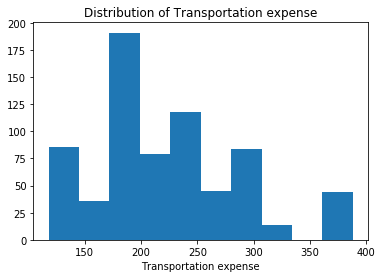

In [22]:
#Univariate analysis - Transportation_expense
plt.hist(df['Transportation_expense'])
plt.title('Distribution of Transportation expense')
plt.xlabel('Transportation expense')

Most of the employees incur maximum transportation expense in the range of 175 - 200, which is nearly half of the maximum fare.

Text(0.5, 0, 'Distance from residence to work')

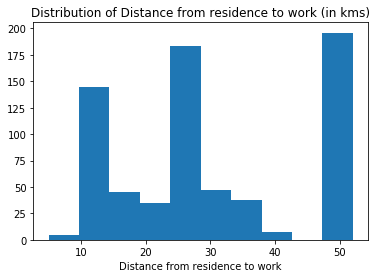

In [23]:
#Univariate analysis - Distance_from_Residence_to_Work
plt.hist(df['Distance_from_Residence_to_Work'])
plt.title('Distribution of Distance from residence to work (in kms)')
plt.xlabel('Distance from residence to work')

Most of the employees travel more than 25 kms from their residence to reach their work place.

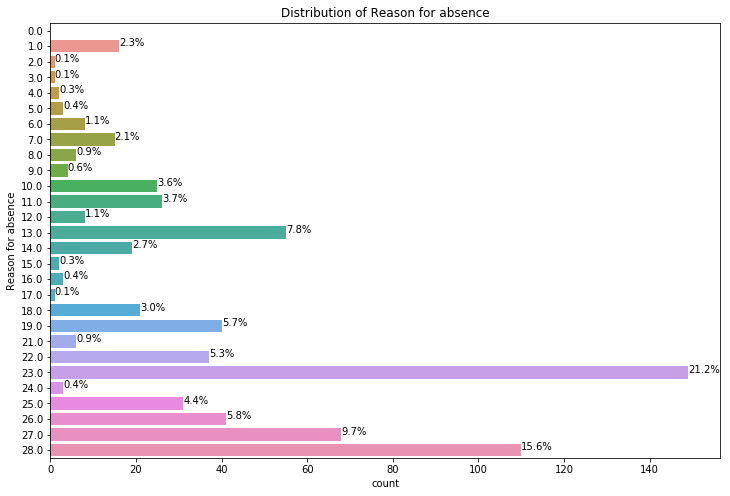

In [24]:
#Univariate analysis - Reason_for_absence
fig, ax= plt.subplots(figsize =(12,8))
ax = sbn.countplot(y = df['Reason_for_absence'])
plt.title('Distribution of Reason for absence')
plt.ylabel('Reason for absence')
total = len(df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

The top four of them cover 50% of the reasons for absence
* Medical consultation
* Dental consultation
* Physiotherapy
* Diseases of the musculoskeletal system and connective tissue

The unjusitified absence amounts to 4.5% of the total.

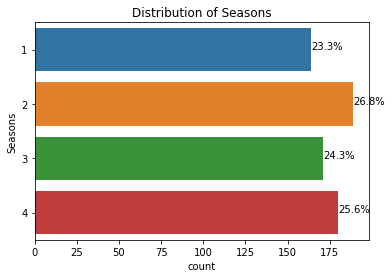

In [25]:
#Univariate analysis - Seasons
ax = sbn.countplot(y = df['Seasons'])
plt.title('Distribution of Seasons')
plt.ylabel('Seasons')
total = len(df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

Highest number of absentees are recored in the Season 4 (Winter) followed by Season 2 (Autumn). 

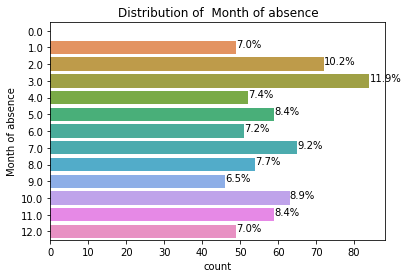

In [26]:
#Univariate analysis - Month_of_absence
ax = sbn.countplot(y = df['Month_of_absence'])
plt.title('Distribution of  Month of absence')
plt.ylabel('Month of absence')
total = len(df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

Highest percentage of absentees are recorded in the month of March followed by February and October, which comes under Winter and Autumn seasons respectively.

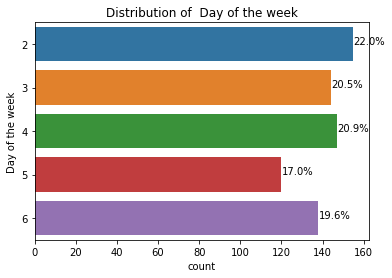

In [27]:
#Univariate analysis - Day_of_the_week
ax = sbn.countplot(y = df['Day_of_the_week'])
plt.title('Distribution of  Day of the week')
plt.ylabel('Day of the week')
total = len(df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

Highest percentage of absentees are recorded on start of the week, Mondays followed by Wednesdays. 

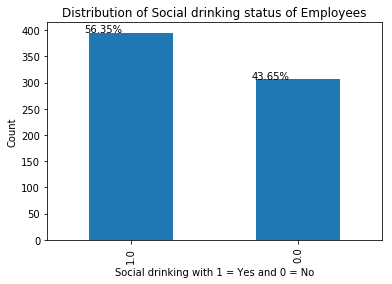

In [28]:
#Univariate analysis - Social_drinker
ax = df['Social_drinker'].value_counts().head(10).plot.bar(title='Distribution of Social drinking status of Employees')
plt.ylabel('Count')
plt.xlabel('Social drinking with 1 = Yes and 0 = No')
totals = []
total = len(df)
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height()+.5, str(round((i.get_height()/total)*100, 2))+'%')

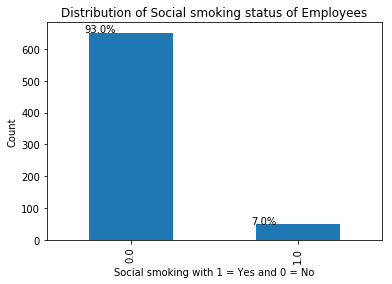

In [29]:
#Univariate analysis - Social_smoker
ax = df['Social_smoker'].value_counts().head(10).plot.bar(title='Distribution of Social smoking status of Employees')
plt.ylabel('Count')
plt.xlabel('Social smoking with 1 = Yes and 0 = No')
totals = []
total = len(df)
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height()+.5, str(round((i.get_height()/total)*100, 2))+'%')

Thus, most of the employees have the habit of social drinking but very few employees have the habit of social smoking.

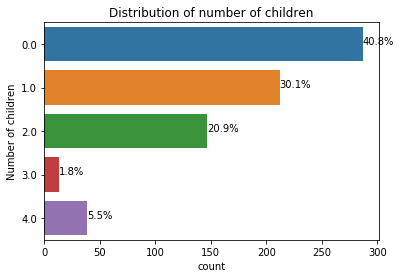

In [30]:
#Univariate analysis - Number of children
ax = sbn.countplot(y = df['Son'])
plt.title('Distribution of number of children')
plt.ylabel('Number of children')
total = len(df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

Most of the employees are married with 0 or 1 child. Thus, they have dependents/children to take care of and their presence might be required in case if their child/dependent fall sick. 

###### Bivariate analysis

Text(0.5, 1.0, 'Distribution of Distance from Residence to Work and Transportation expense')

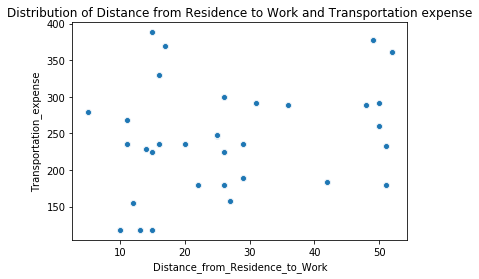

In [31]:
#Bivariate analysis - Distance_from_Residence_to_Work and Transportation_expense
sbn.scatterplot(x='Distance_from_Residence_to_Work',y='Transportation_expense',data=df)
plt.title('Distribution of Distance from Residence to Work and Transportation expense')

This plot shows us that distance from residence to work and transportation expense are weakly correlated and there is no information on the mode of transport, peak hours, traffic factors; But,the general hypothesis is that transportation expense increases with distance from residence to work. 

Text(0.5, 1.0, 'Distribution of Age and Service time of the employees')

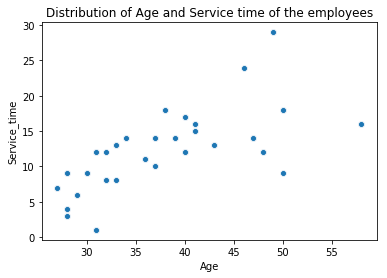

In [32]:
#Bivariate analysis - Age and Service_time
sbn.scatterplot(x='Age',y='Service_time',data=df)
plt.title('Distribution of Age and Service time of the employees')

This plot clearly tells us that Age and Service time are positively correlated and it is obvious that service time of a person increases with his age.  

Text(0.5, 1.0, 'Distribution of Average work load per day by age of the employees')

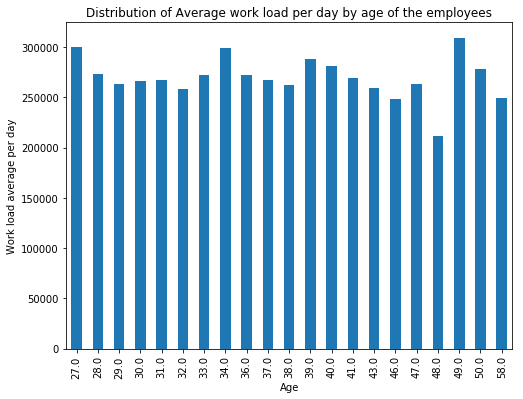

In [33]:
#Bivariate analyis - Age and Work_load_Average/day
age_work = df.groupby('Age', as_index=False)[['Work_load_Average/day']].mean()
ax = age_work.plot(kind='bar', x='Age', figsize=(8,6), legend=False)
ax.set_ylabel('Work load average per day')
ax.set_title('Distribution of Average work load per day by age of the employees')

The work load seems to be same irrespective of the age.

Text(0.5, 1.0, 'Distribution of Average Distance from Residence to Work by age')

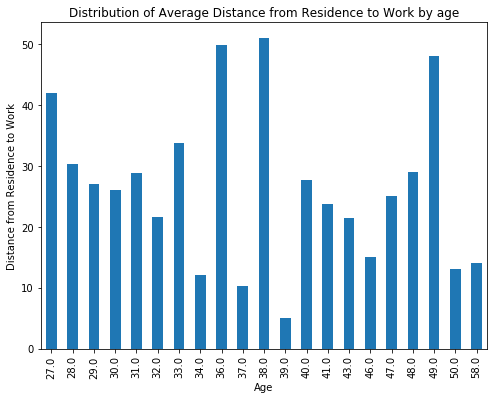

In [34]:
#Bivariate analysis - Age and Distance_from_Residence_to_Work
age_distance = df.groupby('Age')[['Distance_from_Residence_to_Work']].mean()
ax = age_distance.plot(kind='bar', figsize=(8,6), legend=False)
ax.set_ylabel('Distance from Residence to Work')
ax.set_title('Distribution of Average Distance from Residence to Work by age')

Another hypothesis is that aged employees might stay closer to the office. But, values after age 33 are not significant to compare as hypothesis fails here after age 33.

Text(0.5, 1.0, 'Distribution of Average Hit target by age')

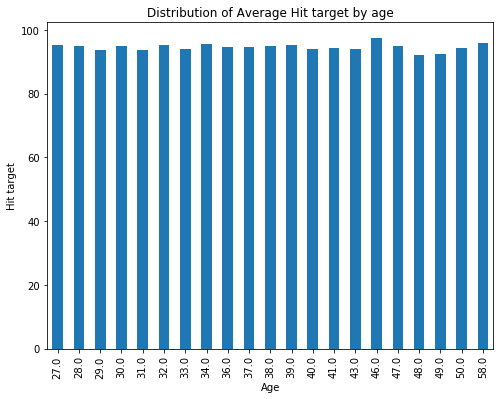

In [35]:
#Bivariate analysis - Age and Hit_target
age_distance = df.groupby('Age')[['Hit_target']].mean()
ax = age_distance.plot(kind='bar', figsize=(8,6), legend=False)
ax.set_ylabel('Hit target')
ax.set_title('Distribution of Average Hit target by age')

Hit target seems to be same irrespective of the age of the employees.

Text(0.5, 1.0, 'Distribution of Average target hit by Social drinking status of the employee')

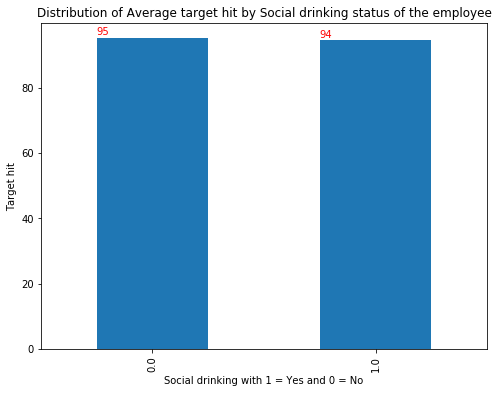

In [36]:
#Bivariate analysis - Social drinking and Hit_target
drink_target = df.groupby('Social_drinker')[['Hit_target']].mean()
ax = drink_target.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(drink_target.values):
    ax.text(i-.25, v + 1, str(np.int(np.round(v))), color='red')
ax.set_xlabel('Social drinking with 1 = Yes and 0 = No')
ax.set_ylabel('Target hit')
ax.set_title('Distribution of Average target hit by Social drinking status of the employee')

It is interesting to observe that employees with social drinking habit have average target hit value nearly equal to non drinkers. Thus, their drinking status doesn't have much impact on their target hit. 

Text(0.5, 21.70625000000002, 'Social drinking with 1 = Yes and 0 = No')

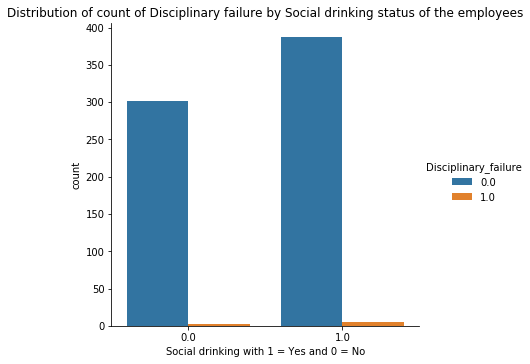

In [37]:
#Bivariate analysis - Social drinking and Disciplinary_failure
sbn.catplot(x="Social_drinker", hue="Disciplinary_failure",data=df, kind="count")
plt.title('Distribution of count of Disciplinary failure by Social drinking status of the employees')
plt.xlabel('Social drinking with 1 = Yes and 0 = No')

Thus, it is clear that social drinking doesn't have any effect on disciplinary failure in employees.

Text(0.5, 1.0, 'Distribution of Work_load_Average/day by Month of absence')

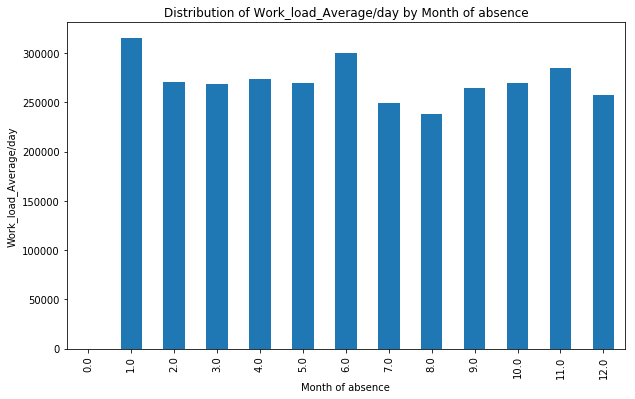

In [38]:
#Bivariate analysis - Work_load_Average/day and Month_of_absence
work_month = df.groupby('Month_of_absence')[['Work_load_Average/day']].mean()
ax = work_month.plot(kind='bar', figsize=(10,6), legend=False)
#for i, v in enumerate(work_month.values):
    #ax.text(i-.25, v + 1, str(np.int(np.round(v))), color='red')
ax.set_xlabel('Month of absence')
ax.set_ylabel('Work_load_Average/day')
ax.set_title('Distribution of Work_load_Average/day by Month of absence')

Work load average/day seems to be higher in the month of January followed by June. It is almost in the same range for rest of the months 

Text(0.5, 1.0, 'Distribution of Average Hit target by work load average/day')

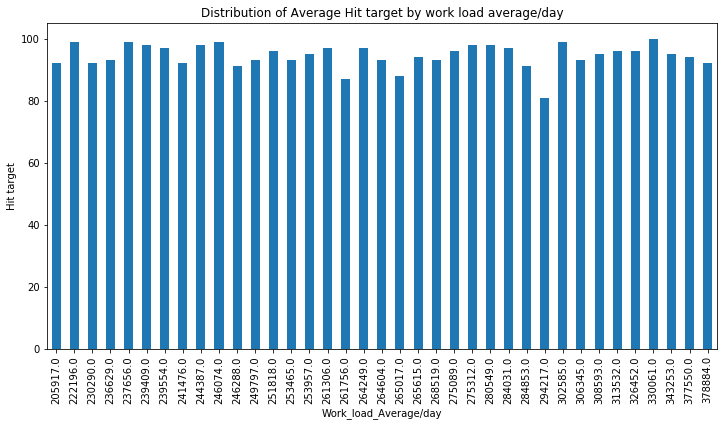

In [39]:
#Bivariate analysis - Work_load_Average/day and Hit_target
work_target = df.groupby('Work_load_Average/day')[['Hit_target']].mean()
ax = work_target.plot(kind='bar', figsize=(12,6), legend=False)
ax.set_ylabel('Hit target')
ax.set_title('Distribution of Average Hit target by work load average/day')

Thus, average target hit is same for almost all the work load average/day.

###### Multivariate analysis

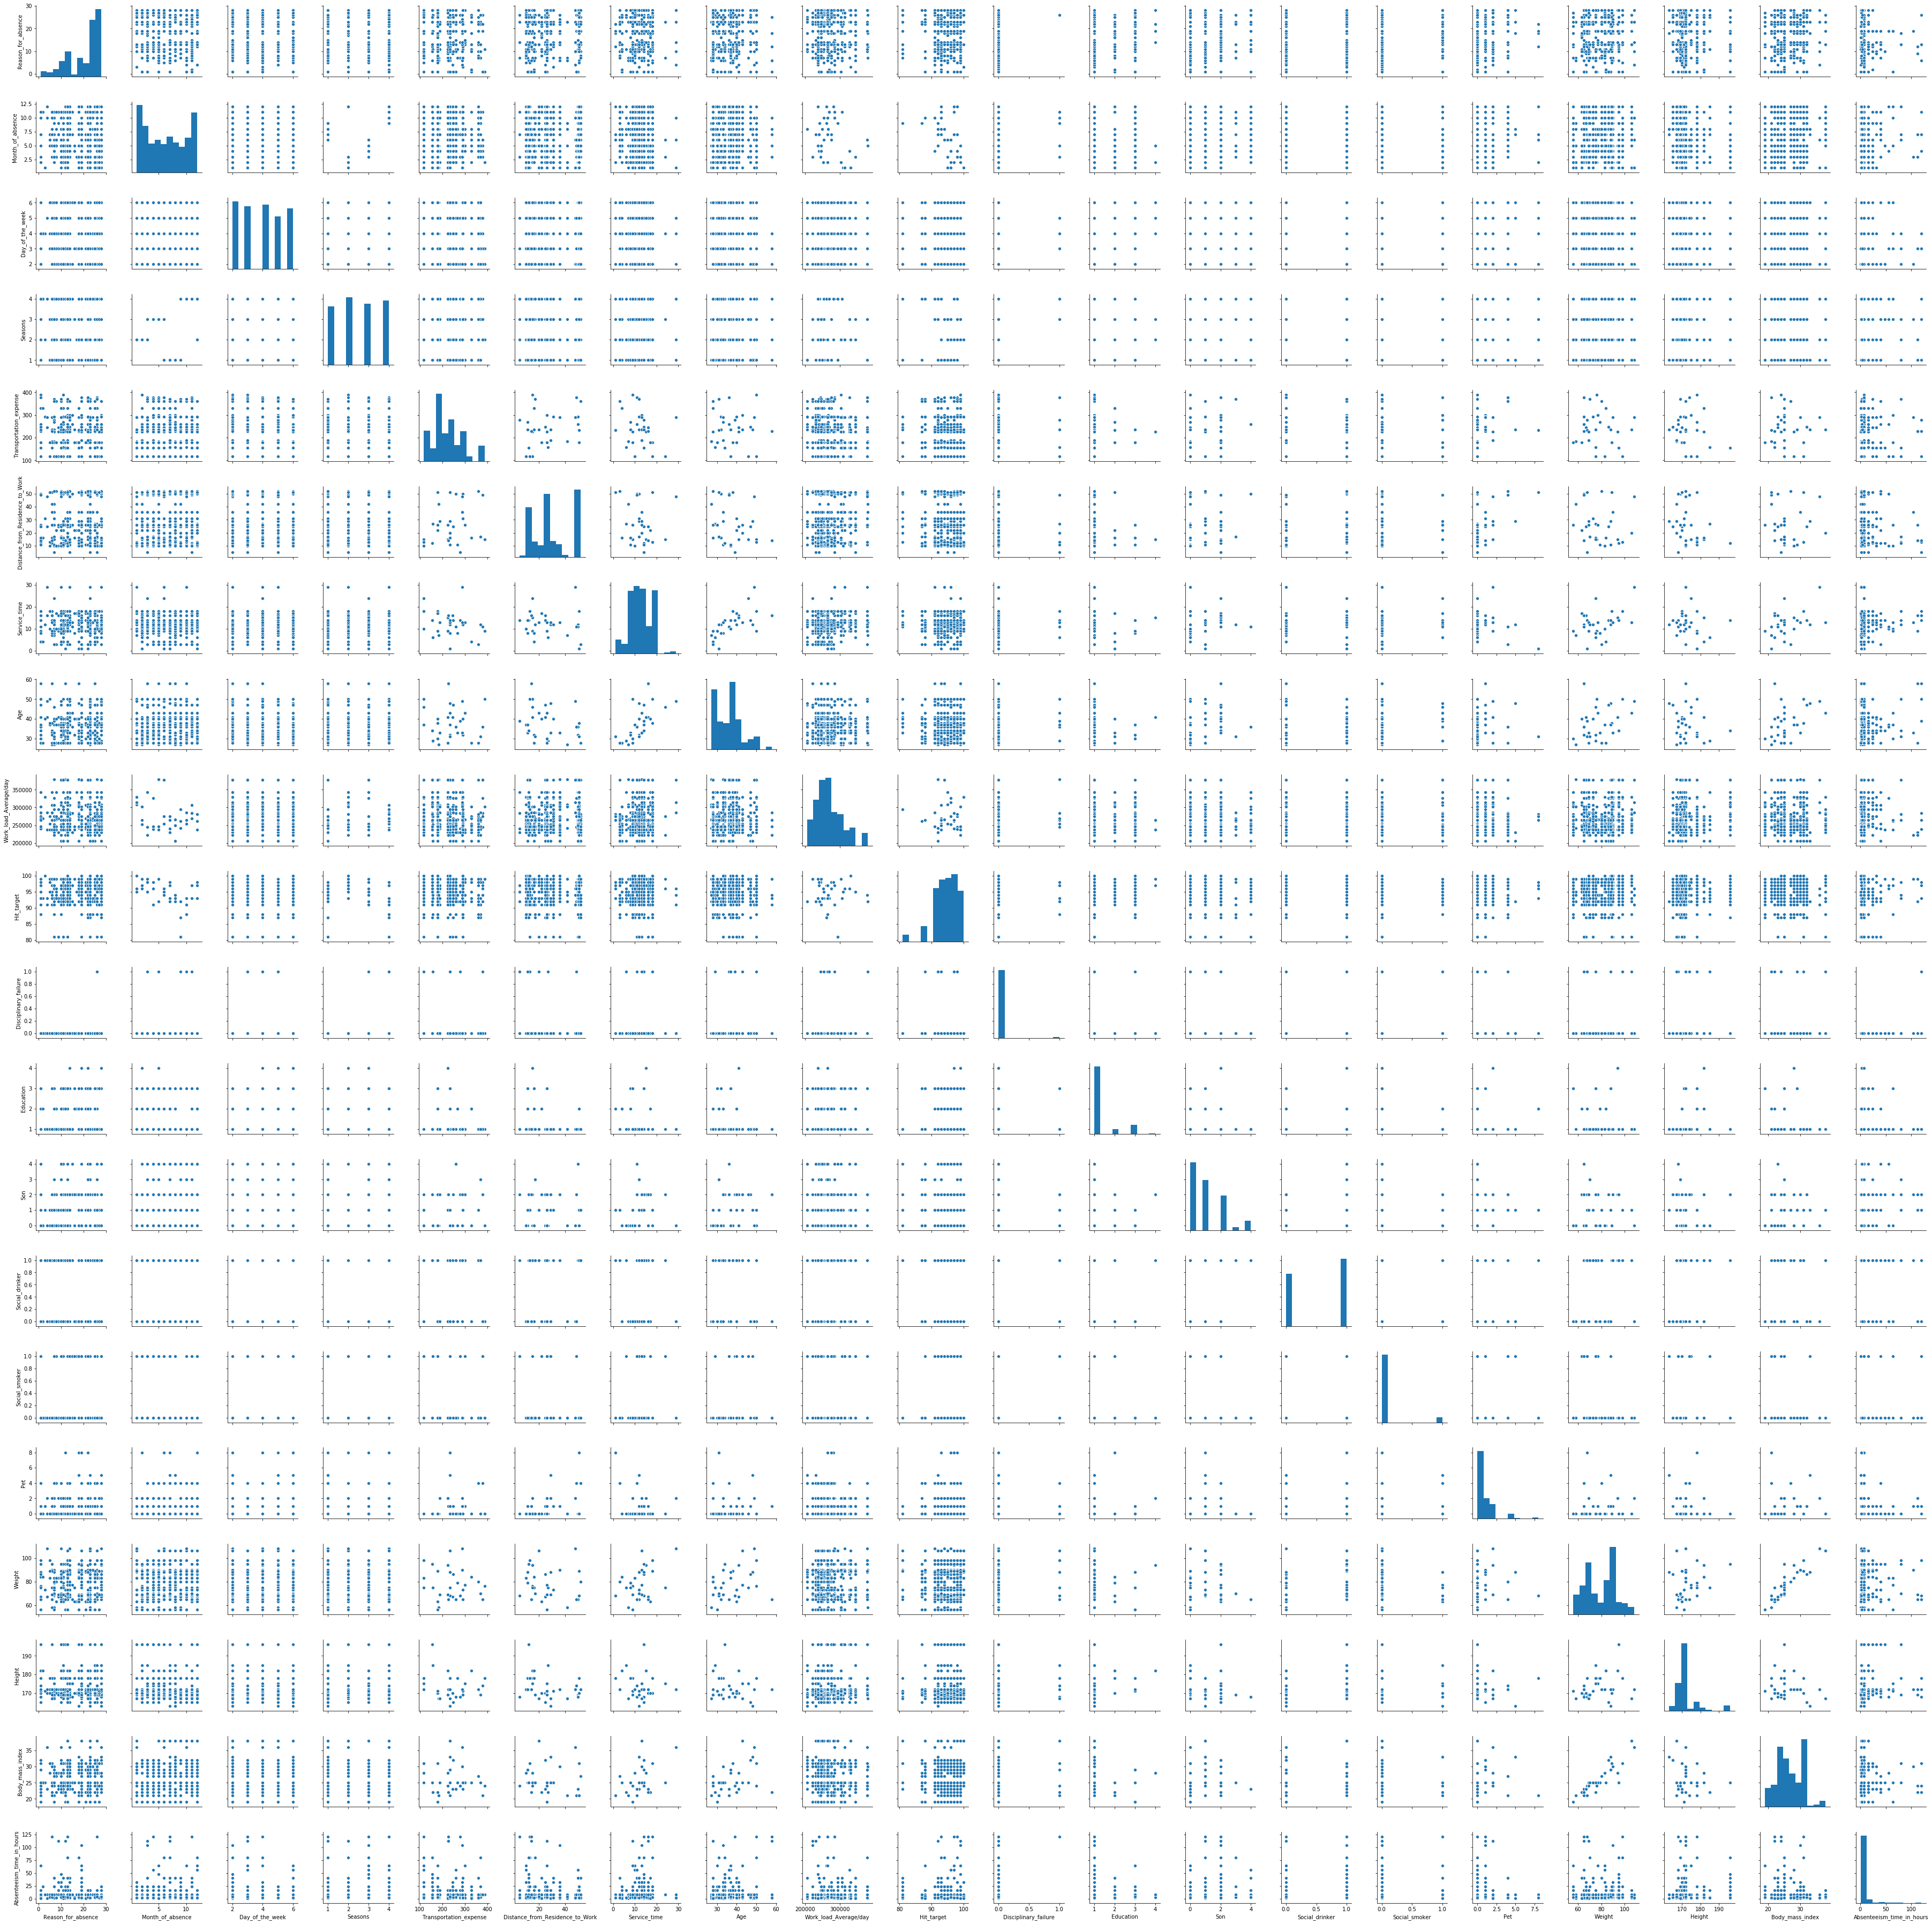

In [40]:
#Multivariate analysis
sbn.pairplot(df.drop('ID', axis=1))

There seems to be not much relationship between attributes except for Age and service time, weight and BMI (Body Mass Index).

#### Missing value Analysis

In [41]:
#to get the sum of missing values in the dataset
df.isnull().sum()

ID                                  0
Reason_for_absence                  3
Month_of_absence                    1
Day_of_the_week                     0
Seasons                             0
Transportation_expense              7
Distance_from_Residence_to_Work     3
Service_time                        3
Age                                 3
Work_load_Average/day              10
Hit_target                          6
Disciplinary_failure                6
Education                          10
Son                                 6
Social_drinker                      3
Social_smoker                       4
Pet                                 2
Weight                              1
Height                             13
Body_mass_index                    29
Absenteeism_time_in_hours          22
dtype: int64

In [42]:
#create dataframe to analyze missing values in training dataset
miss_val = pd.DataFrame(df.isnull().sum())
miss_val = miss_val.reset_index()
miss_val = miss_val.rename(columns = {"index":"Attributes",0:"Missing values"})
miss_val['Missing Percentage'] = (miss_val['Missing values']/len(df))*100
miss_val = miss_val.sort_values("Missing Percentage",ascending=False).reset_index(drop=True)
miss_val

,Attributes,Missing values,Missing Percentage
0,Body_mass_index,29,4.119318
1,Absenteeism_time_in_hours,22,3.125000
2,Height,13,1.846591
3,Work_load_Average/day,10,1.420455
4,Education,10,1.420455
5,Transportation_expense,7,0.994318
6,Son,6,0.852273
7,Disciplinary_failure,6,0.852273
8,Hit_target,6,0.852273
9,Social_smoker,4,0.568182


Since the percentage of missing values of the attributes in the dataset is less, we can impute the missing values statistically.

Imputation of missing values in the dataset: 

Imputation is a method to fill in the missing values with estimated ones. Mean / Mode / Median imputation is one of the most frequently used methods. It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.

Since, the attributes are numerical and categorical, we can opt for Mean/Median/Mode and KNN methods for imputation.

To find the apt method out of all,

1. Remove any random value from the column missing and replace with NA.
2. Impute the null value with methods one by one.
3. Select the method with output nearly equal to the original value

In [43]:
#Imputing missing values - continuous attributes

#Choosing a random value from Weight attribute to replace it as NA
act_val = df['Weight'].iloc[20]

#Replace actual value with NaN
df['Weight'].iloc[20] = np.nan

#Mean imputation
mean_val = np.nanmean(df['Weight'])
df['Weight'].iloc[20] = np.nan

#Median imputation 
median_val = np.nanmedian(df['Weight'])
df['Weight'].iloc[20] = np.nan

#KNN imputation using k = 3, 5, 7 values
df_knn3 = pd.DataFrame(KNN(k=3).fit_transform(df),columns = df.columns,index=df.index)
knn3_val = df_knn3['Weight'].iloc[20]
df_knn5 = pd.DataFrame(KNN(k=5).fit_transform(df),columns = df.columns,index=df.index)
knn5_val = df_knn5['Weight'].iloc[20]
df_knn7 = pd.DataFrame(KNN(k=7).fit_transform(df),columns = df.columns,index=df.index)
knn7_val = df_knn7['Weight'].iloc[20]

#Substitute with actual value
df['Weight'].iloc[20] = act_val

#Imputing missing values - categorical attributes

#Choosing a random value from Education attribute to replace it as NA
act_cat_val = df['Education'].iloc[83]

#Replace actual value with NaN
df['Education'].iloc[83] = np.nan

#Mode inputation
mode_val = df['Education'].mode()
df['Education'].iloc[83] = np.nan

#Substitute with actual value
df['Education'].iloc[83] = act_cat_val

Imputing row 1/704 with 0 missing, elapsed time: 0.424
Imputing row 101/704 with 1 missing, elapsed time: 0.438
Imputing row 201/704 with 0 missing, elapsed time: 0.441
Imputing row 301/704 with 0 missing, elapsed time: 0.443
Imputing row 401/704 with 0 missing, elapsed time: 0.444
Imputing row 501/704 with 0 missing, elapsed time: 0.445
Imputing row 601/704 with 0 missing, elapsed time: 0.447
Imputing row 701/704 with 0 missing, elapsed time: 0.448
Imputing row 1/704 with 0 missing, elapsed time: 0.189
Imputing row 101/704 with 1 missing, elapsed time: 0.193
Imputing row 201/704 with 0 missing, elapsed time: 0.196
Imputing row 301/704 with 0 missing, elapsed time: 0.198
Imputing row 401/704 with 0 missing, elapsed time: 0.200
Imputing row 501/704 with 0 missing, elapsed time: 0.201
Imputing row 601/704 with 0 missing, elapsed time: 0.202
Imputing row 701/704 with 0 missing, elapsed time: 0.203
Imputing row 1/704 with 0 missing, elapsed time: 0.217
Imputing row 101/704 with 1 missing, 

In [44]:
#Results of Imputation

print("###### Imputing missing values for continuous attribute - example ######")
print("Actual value is: %f" % (act_val))
print("Mean value is:%i" % int(mean_val))
print("Median value is:%i" % int(median_val))
print("KNN value for k = 3 is:%i" % int(knn3_val))
print("KNN value for k = 5 is:%i" % int(knn5_val))
print("KNN value for k = 7 is:%i" % int(knn7_val))

print("###### Imputing missing values for categorical attribute - example ######")
print("Actual value is: %f" % (act_cat_val))
print("Mode value is:%f" % (mode_val))
print("KNN value for k = 3 is:%f" % (df_knn5['Education'].iloc[83]))
print("KNN value for k = 5 is:%f" % (df_knn5['Education'].iloc[83]))
print("KNN value for k = 7 is:%f" % (df_knn7['Education'].iloc[83]))

###### Imputing missing values for continuous attribute - example ######
Actual value is: 89.000000
Mean value is:78
Median value is:80
KNN value for k = 3 is:89
KNN value for k = 5 is:88
KNN value for k = 7 is:87
###### Imputing missing values for categorical attribute - example ######
Actual value is: 1.000000
Mode value is:1.000000
KNN value for k = 3 is:1.000000
KNN value for k = 5 is:1.000000
KNN value for k = 7 is:1.000000


Thus, from the above methods of imputation, we can choose KNN method for imputation with k = 3.

In [45]:
#Impute missing values with k = 3
df = pd.DataFrame(KNN(k=3).fit_transform(df),columns = df.columns ,index = df.index)
for i in num_cols:
        df[i]= round(df[i])
df['ID'] = df['ID'].astype('int64')      
for i in cat_cols:
    df[i] =  df[i].astype('int64')
    df[i] = df[i].astype('category')

Imputing row 1/704 with 0 missing, elapsed time: 0.216
Imputing row 101/704 with 1 missing, elapsed time: 0.220
Imputing row 201/704 with 0 missing, elapsed time: 0.222
Imputing row 301/704 with 0 missing, elapsed time: 0.224
Imputing row 401/704 with 0 missing, elapsed time: 0.225
Imputing row 501/704 with 0 missing, elapsed time: 0.227
Imputing row 601/704 with 0 missing, elapsed time: 0.227
Imputing row 701/704 with 0 missing, elapsed time: 0.228


In [46]:
#to check for missing values after imputation
df.isnull().sum()

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day              0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

Thus, there are no missing values present in the dataset.

#### Outlier analysis

##### Boxplot analysis

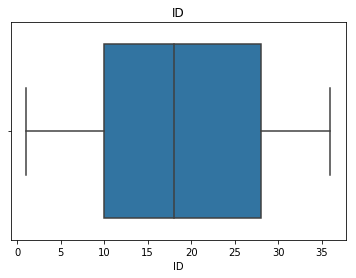

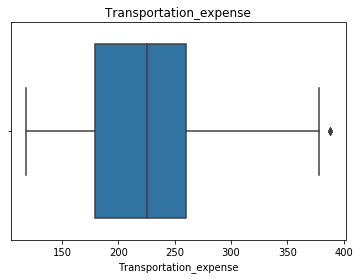

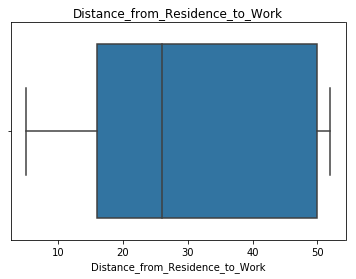

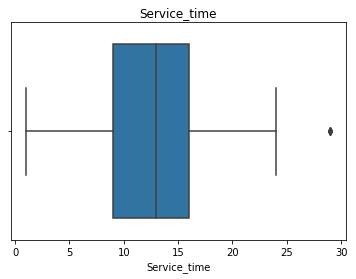

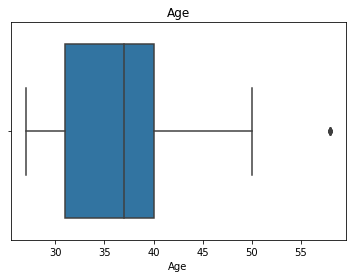

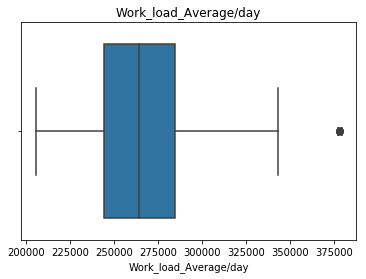

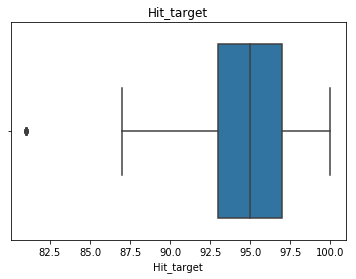

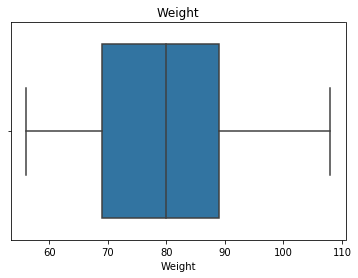

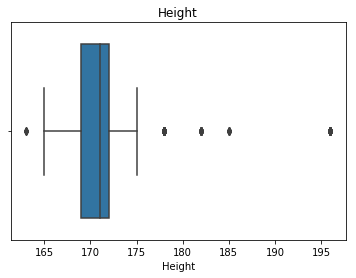

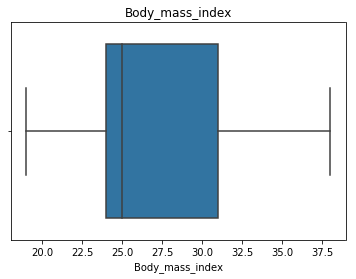

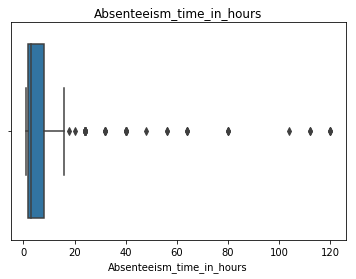

In [47]:
#Plot boxplot to identify outliers in the dataset
for i in num_cols:
        plt.figure()
        plt.clf() #clearing the figure
        sbn.boxplot(df[i])
        plt.title(i)

In [48]:
#Outlier analysis using boxplot method
print("******** Outlier Analysis ********")
for i in num_cols:
    print("  ")
    print("***** " + i + " *****")
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Minimum and Maximum values are:")
    print(min_val)
    print(max_val)
    
    print('{var} -----> {X} Outliers'.format(var = i, X = (df.loc[df.loc[:,i] < min_val,i].count() + 
                                                           df.loc[df.loc[:,i] > max_val,i].count())))  


******** Outlier Analysis ********
  
***** ID *****
Minimum and Maximum values are:
-17.0
55.0
ID -----> 0 Outliers
  
***** Transportation_expense *****
Minimum and Maximum values are:
57.5
381.5
Transportation_expense -----> 2 Outliers
  
***** Distance_from_Residence_to_Work *****
Minimum and Maximum values are:
-35.0
101.0
Distance_from_Residence_to_Work -----> 0 Outliers
  
***** Service_time *****
Minimum and Maximum values are:
-1.5
26.5
Service_time -----> 5 Outliers
  
***** Age *****
Minimum and Maximum values are:
17.5
53.5
Age -----> 8 Outliers
  
***** Work_load_Average/day *****
Minimum and Maximum values are:
182813.625
346076.625
Work_load_Average/day -----> 28 Outliers
  
***** Hit_target *****
Minimum and Maximum values are:
87.0
103.0
Hit_target -----> 15 Outliers
  
***** Weight *****
Minimum and Maximum values are:
39.0
119.0
Weight -----> 0 Outliers
  
***** Height *****
Minimum and Maximum values are:
164.5
176.5
Height -----> 109 Outliers
  
***** Body_mass_ind

In [49]:
#to replace outlier values with NaN
print("***** After Replacing Outlier values with NaN *****")
print("    ")
for i in num_cols:
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    df.loc[df.loc[:,i]<min_val, i] = np.nan
    df.loc[df.loc[:,i]>max_val, i] = np.nan
    
    print('{var} -----> {X} Outliers'.format(var = i, X = (df.loc[df.loc[:,i] < min_val,i].count() + 
                                                           df.loc[df.loc[:,i] > max_val,i].count())))   

***** After Replacing Outlier values with NaN *****
    
ID -----> 0 Outliers
Transportation_expense -----> 0 Outliers
Distance_from_Residence_to_Work -----> 0 Outliers
Service_time -----> 0 Outliers
Age -----> 0 Outliers
Work_load_Average/day -----> 0 Outliers
Hit_target -----> 0 Outliers
Weight -----> 0 Outliers
Height -----> 0 Outliers
Body_mass_index -----> 0 Outliers
Absenteeism_time_in_hours -----> 0 Outliers


In [50]:
#to impute NaN values with KNN method using k = 3
df = pd.DataFrame(KNN(k=3).fit_transform(df),columns = df.columns,index=df.index)
for i in num_cols:
    df[i]= round(df[i])
df['ID'] = df['ID'].astype('int64')      
for i in cat_cols:
    df[i] =  df[i].astype('int64')
    df[i] = df[i].astype('category')

Imputing row 1/704 with 0 missing, elapsed time: 0.219
Imputing row 101/704 with 1 missing, elapsed time: 0.222
Imputing row 201/704 with 2 missing, elapsed time: 0.224
Imputing row 301/704 with 0 missing, elapsed time: 0.228
Imputing row 401/704 with 0 missing, elapsed time: 0.229
Imputing row 501/704 with 0 missing, elapsed time: 0.231
Imputing row 601/704 with 0 missing, elapsed time: 0.233
Imputing row 701/704 with 0 missing, elapsed time: 0.235


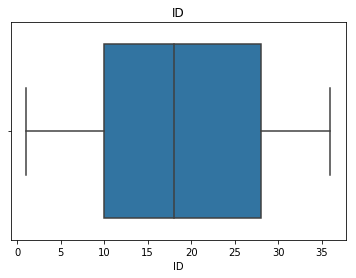

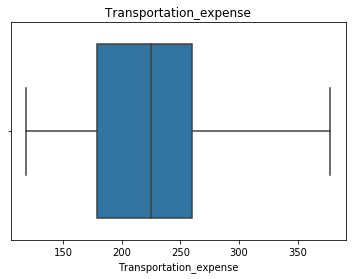

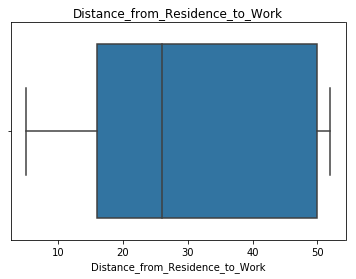

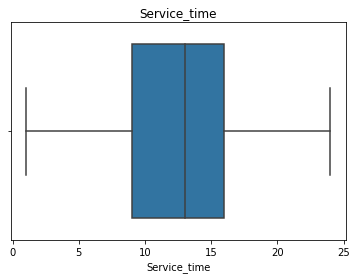

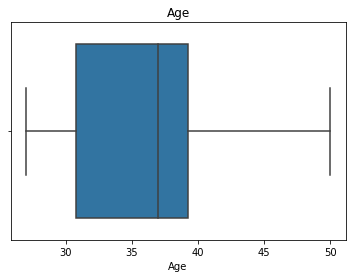

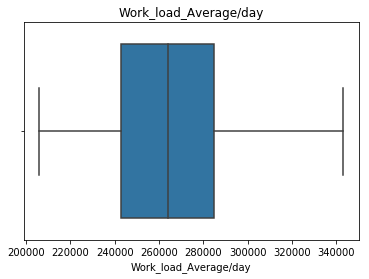

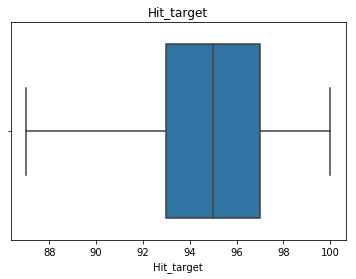

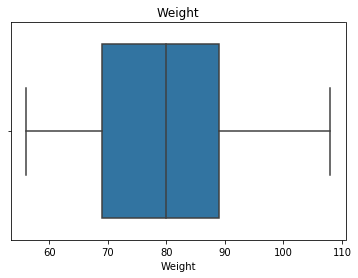

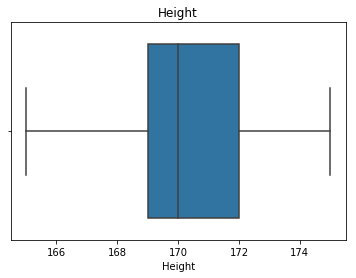

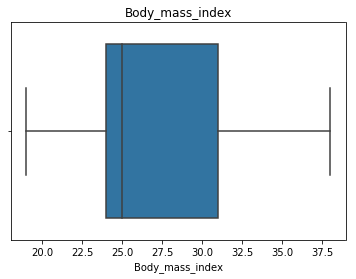

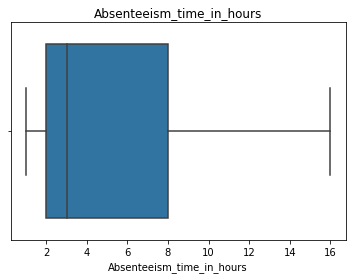

In [51]:
#to check if the outliers have been imputed
for i in num_cols:
    plt.figure()
    plt.clf() #clearing the figure
    sbn.boxplot(df[i])
    plt.title(i)
    plt.show()

Thus, there are no outliers present in the dataset. 

##### Data Visualization

Data visualization helps us to understand the relationship between features. Here, to understand how each independent feature is related to the target feature, we need to perform visualization on data.

###### Distance from Residence to Work Vs Absenteeism time in hours

Text(0.5, 1.0, 'Average Absenteeism time in hours by distance')

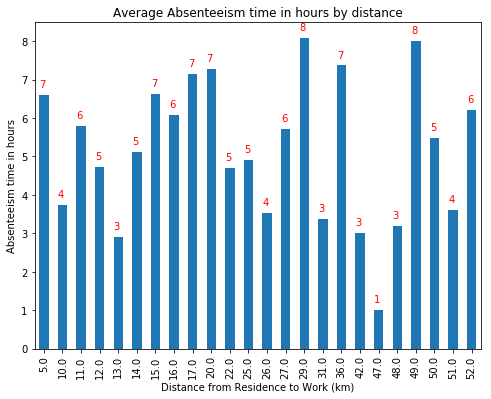

In [52]:
dist = df.groupby('Distance_from_Residence_to_Work')[['Absenteeism_time_in_hours']].mean()
ax = dist.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(dist.values):
    ax.text(i-.25, v + 0.2, str(np.int(np.round(v))), color='red')
plt.xlabel('Distance from Residence to Work (km)')
plt.ylabel('Absenteeism time in hours')
plt.title('Average Absenteeism time in hours by distance')

General hypothesis is that distance from residence to work will have an impact on absenteeism. Here, average hours of absent remains the same irrespective of the distance from residence to work of the employees. There is concentration of more leaves where the distance of residence from work is between 10-30 kms.

###### Work load Average/day Vs Absenteeism time in hours

Text(0.5, 1.0, 'Average Absenteeism time in hours by Work load average/day')

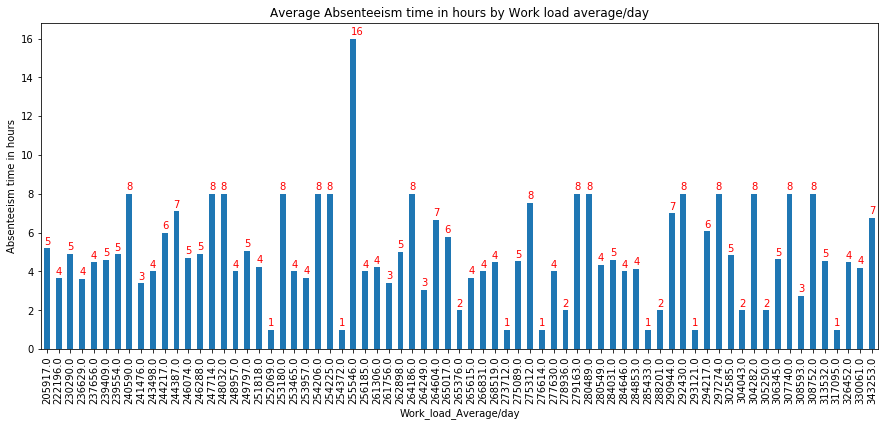

In [53]:
wl = df.groupby('Work_load_Average/day')[['Absenteeism_time_in_hours']].mean()
ax = wl.plot(kind='bar', figsize=(15,6), legend=False)
for i, v in enumerate(wl.values):
    ax.text(i-.25, v + 0.2, str(np.int(np.round(v))), color='red')
plt.xlabel('Work_load_Average/day')
plt.ylabel('Absenteeism time in hours')
plt.title('Average Absenteeism time in hours by Work load average/day')

Thus, average hours of absent remains same irrespective of the work load average/day. 

###### Service time Vs Absenteeism time in hours

Text(0.5, 1.0, 'Average Absenteeism time in hours by Service time')

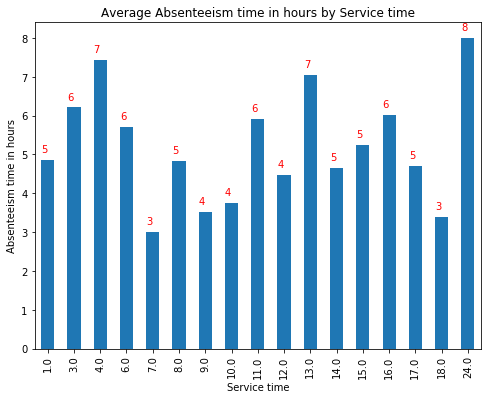

In [54]:
st = df.groupby('Service_time')[['Absenteeism_time_in_hours']].mean()
ax = st.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(st.values):
    ax.text(i-.25, v + 0.20, str(np.int(np.round(v))), color='red')
plt.xlabel('Service time')
plt.ylabel('Absenteeism time in hours')
plt.title('Average Absenteeism time in hours by Service time')

Thus, the employees with service years > 8 tend to take more leaves.

###### Disciplinary failure Vs Absenteeism time in hours

Text(0.5, 1.0, 'Total Absenteeism time in hours by Disciplinary failure in Employees')

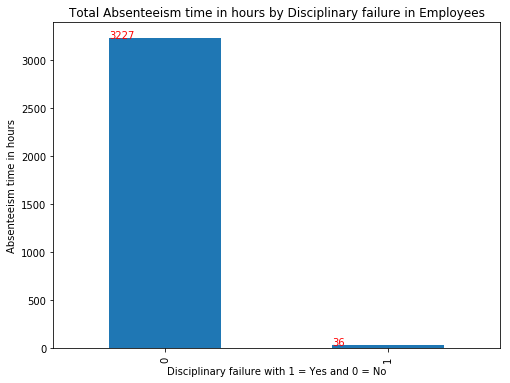

In [55]:
disp_absent = df.groupby('Disciplinary_failure')['Absenteeism_time_in_hours'].sum()
ax = disp_absent.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(disp_absent.values):
    ax.text(i-.25, v + 0.4, str(np.int(np.round(v))), color='red')
plt.xlabel('Disciplinary failure with 1 = Yes and 0 = No')
plt.ylabel('Absenteeism time in hours')
plt.title('Total Absenteeism time in hours by Disciplinary failure in Employees')

Thus, it is observed that employees with no disciplinary failure have the highest absent hours in total. 

###### Age of the employees Vs Absenteeism time in hours

Text(0.5, 1.0, 'Average Absenteeism time in hours by Age of the Employees')

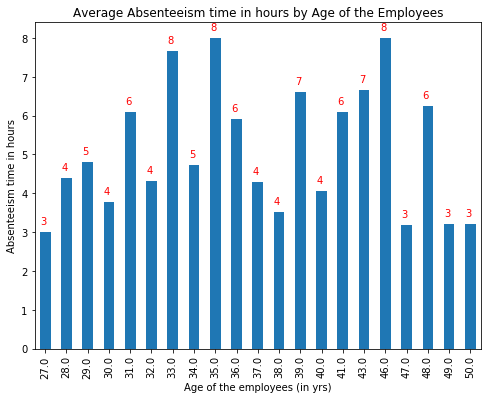

In [56]:
age_abs = df.groupby('Age')[['Absenteeism_time_in_hours']].mean()
ax = age_abs.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(age_abs.values):
    ax.text(i-.25, v + 0.2, str(np.int(np.round(v))), color='red')
plt.xlabel('Age of the employees (in yrs)')
plt.ylabel('Absenteeism time in hours')
plt.title('Average Absenteeism time in hours by Age of the Employees')

Hypothesis is that as the age increases, employees tend to take more leave compared to others due to health issues. Here, people over 45+ years of age tends to take less leaves compared to others.

###### Number of children Vs Absenteeism time in hours

Text(0.5, 1.0, 'Total Absenteeism time in hours by Children')

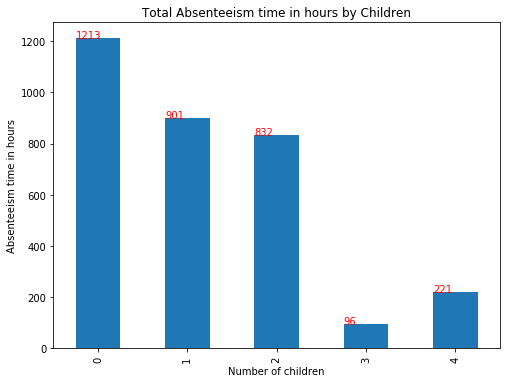

In [57]:
son = df.groupby('Son')['Absenteeism_time_in_hours'].sum()
ax = son.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(son.values):
    ax.text(i-.25, v + 0.5, str(np.int(np.round(v))), color='red')
plt.xlabel('Number of children')
plt.ylabel('Absenteeism time in hours')
plt.title('Total Absenteeism time in hours by Children')

It is interesting to note that employees with no issues have highest absenteeism. This is followed by employees with 1 child and it might be due to the fact that there would be noone else to take care of the child if it falls sick and one parent has to stay back with the kid. In case of 3 or 4 children, there is a high chance that older siblings take care of younger ones. 

###### Number of pets Vs Absenteeism time in hours

Text(0.5, 1.0, 'Total Absenteeism time in hours by Pet')

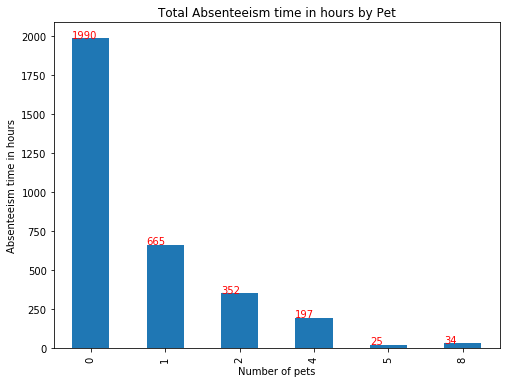

In [58]:
pet = df.groupby('Pet')['Absenteeism_time_in_hours'].sum()
ax = pet.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(pet.values):
    ax.text(i-.25, v + 1, str(np.int(np.round(v))), color='red')
plt.xlabel('Number of pets')
plt.ylabel('Absenteeism time in hours')
plt.title('Total Absenteeism time in hours by Pet')

It is to be noted that the employees with no pet or 1 pet are frequent absentees.

###### Reason for absence Vs Absenteeism time in hours

Text(0.5, 1.0, 'Total Absenteeism time in hours by Reason for absence')

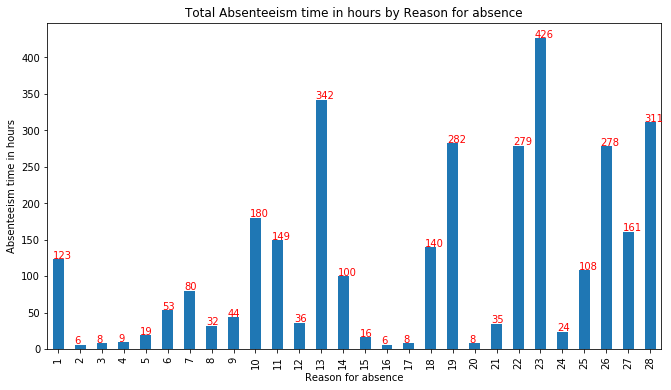

In [59]:
reason_absent = df.groupby('Reason_for_absence')[['Absenteeism_time_in_hours']].sum()
ax = reason_absent.plot(kind='bar', figsize=(11,6), legend=False)
for i, v in enumerate(reason_absent.values):
    ax.text(i-.25, v + 1, str(np.int(np.round(v))), color='red')
plt.xlabel('Reason for absence')
plt.ylabel('Absenteeism time in hours')
plt.title('Total Absenteeism time in hours by Reason for absence')

###### Reasons and Remedies/Suggestions to reduce absenteeism:

The top four reasons for absence are:
    
* Diseases of the musculoskeletal system and connective tissue
* Injury, poisoning and certain other consequences of external causes
* Medical consultation
* Unjustified absence

Remedies/Suggestions to reduce absenteeism:

1. Musculoskeletal system disease is the major reason of absenteeism. Bad working posture and high workload are possible reasons for the high incidence of musculoskeletal disease. Company should conduct a study on the working postures of people and come up with ergonomic workplace design. Company should try to optimize workload keeping in mind occupational health of working people.
2. Injury, poisoning and certain other consequences of external causes can be the consequences of the bad and unsafe working environment. Safety of the employees should be the major concern of the company.
3. Medical and dental consultation can be brought down by optimizing workloads and adapting to employee friendly workplace and conducting more programs and medical camps to create awareness on importance of physical and mental wellness among employees. 
4. Unjustified absence is too high.Company should try to reduce high workloads and set up measures so that employees don't feel work stress and they get to discuss work related problems and pressures.
5. Counselling sessions are to be conducted on regular basis to employees to get their feedbacks and help them in their work and personal issues if any.

###### Month of absence Vs Absenteeism time in hours 

Text(0.5, 1.0, 'Total Absenteeism time in hours by Month of absence')

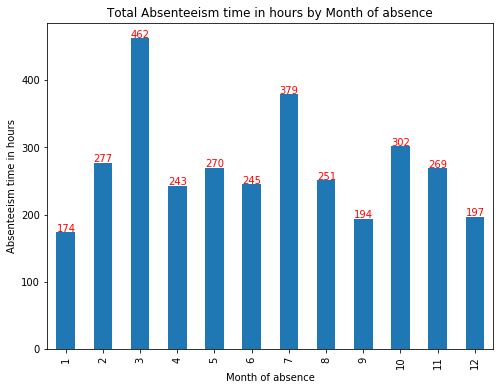

In [60]:
month = df.groupby('Month_of_absence')[['Absenteeism_time_in_hours']].sum()
ax = month.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(month.values):
    ax.text(i-.25, v + 1, str(np.int(np.round(v))), color='red')
plt.xlabel('Month of absence')
plt.ylabel('Absenteeism time in hours')
plt.title('Total Absenteeism time in hours by Month of absence')

We can infer that maximum hours of absent are recorded in the month of March followed by July. we can check the reason for absence in these months to analyse further.

In [61]:
monthly_absence = df.groupby('Month_of_absence')['Absenteeism_time_in_hours'].sum()
monthly_absence = monthly_absence.reset_index()
monthly_absence['Percentage_of_absent_hours'] = monthly_absence['Absenteeism_time_in_hours']/sum(monthly_absence['Absenteeism_time_in_hours']) *100
monthly_absence = monthly_absence.sort_values('Absenteeism_time_in_hours',ascending = False).reset_index(drop=True)
monthly_absence

,Month_of_absence,Absenteeism_time_in_hours,Percentage_of_absent_hours
0,3,462.0,14.158750
1,7,379.0,11.615078
2,10,302.0,9.255287
3,2,277.0,8.489120
4,5,270.0,8.274594
5,11,269.0,8.243947
6,8,251.0,7.692308
7,6,245.0,7.508428
8,4,243.0,7.447135
9,12,197.0,6.037389


In [62]:
#Reasons for absence in March month
mar_absent = df[df['Month_of_absence']==3].groupby('Reason_for_absence', as_index=False)['Absenteeism_time_in_hours'].sum()
mar_absent = mar_absent[mar_absent['Absenteeism_time_in_hours']>0]
mar_absent.sort_values('Absenteeism_time_in_hours', ascending=False).reset_index(drop=True)

,Reason_for_absence,Absenteeism_time_in_hours
0,13,62.0
1,22,56.0
2,19,51.0
3,28,43.0
4,27,41.0
5,11,40.0
6,14,33.0
7,23,28.0
8,26,24.0
9,1,16.0


The top four reasons for absence are:
 
* Diseases of the musculoskeletal system and connective tissue
* Patient follow-up 
* Injury, poisoning and certain other consequences of external causes
* Dental consultation

In [63]:
#Reasons for absence in July month
july_absent = df[df['Month_of_absence']==7].groupby('Reason_for_absence', as_index=False)['Absenteeism_time_in_hours'].sum()
july_absent = july_absent[july_absent['Absenteeism_time_in_hours']>0]
july_absent.sort_values('Absenteeism_time_in_hours', ascending=False).reset_index(drop=True)

,Reason_for_absence,Absenteeism_time_in_hours
0,22,72.0
1,26,56.0
2,1,40.0
3,19,37.0
4,23,24.0
5,11,21.0
6,28,18.0
7,25,17.0
8,13,16.0
9,6,16.0


The top four reasons for absence are:

* Patient follow-up
* Unjustified absence
* Certain infectious and parasitic diseases
* Injury, poisoning and certain other consequences of external causes

Unjustified absence might be due to personal reason(vacation with family) as it is holiday season.

###### Seasons Vs Absenteeism time in hours 

Text(0.5, 1.0, 'Total Absenteeism time in hours by Seasons')

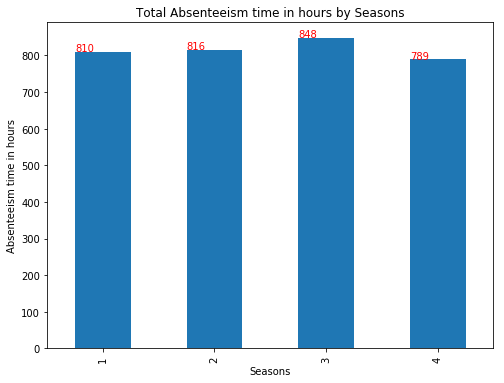

In [64]:
season = df.groupby('Seasons')[['Absenteeism_time_in_hours']].sum()
ax = season.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(season.values):
    ax.text(i-.25, v + 1, str(np.int(np.round(v))), color='red')
plt.xlabel('Seasons')
plt.ylabel('Absenteeism time in hours')
plt.title('Total Absenteeism time in hours by Seasons')

Winter season has highest absenteeism followed by Summer. It is also to be noted that March and July month has highest absenteeism. 

###### Day of the week Vs Absenteeism time in hours

Text(0.5, 1.0, 'Total Absenteeism time in hours by day of the week')

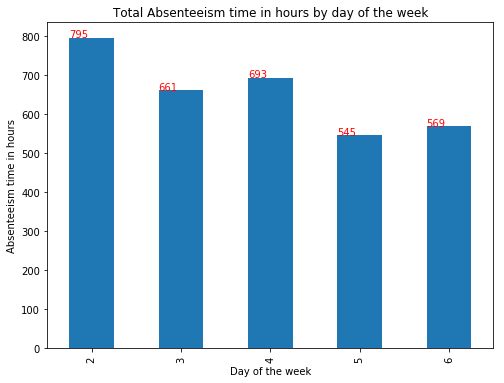

In [65]:
day_absent = df.groupby('Day_of_the_week')[['Absenteeism_time_in_hours']].sum()
ax = day_absent.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(day_absent.values):
    ax.text(i-.25, v + 1, str(np.int(np.round(v))), color='red')
plt.xlabel('Day of the week')
plt.ylabel('Absenteeism time in hours')
plt.title('Total Absenteeism time in hours by day of the week')

Highest percentage of absenteeism is recorded on start of the week, Mondays followed by Tuesdays which can be due to the fact that most people travel over weekend and they tend to extend their holiday plan till monday/tuesday. 

###### Effect on Absenteeism by Social drinking/smoking in employees

Text(0.5, 1.0, 'Absenteeism by Social Drinkers/Smokers')

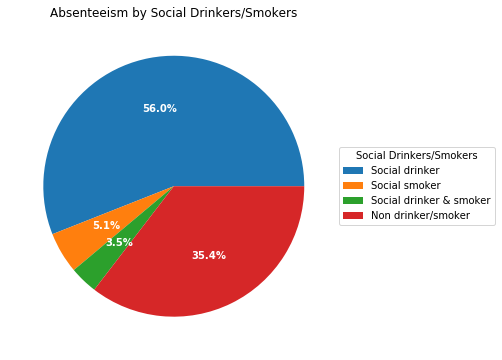

In [66]:
drink_only = df[(df['Social_drinker'] == 1) & (df['Social_smoker']==0)]['Absenteeism_time_in_hours'].sum()
smoke_only = df[(df['Social_drinker'] == 0) & (df['Social_smoker']==1)]['Absenteeism_time_in_hours'].sum()
drink_smoke_both = df[(df['Social_drinker'] == 1) & (df['Social_smoker']==1)]['Absenteeism_time_in_hours'].sum()
no_drink_smoke = df[(df['Social_drinker'] == 0) & (df['Social_smoker']==0)]['Absenteeism_time_in_hours'].sum()
absent_drink_smoke = [drink_only, smoke_only, drink_smoke_both, no_drink_smoke]
pie_labels = ['Social drinker', 'Social smoker', 'Social drinker & smoker', 'Non drinker/smoker']
fig, ax = plt.subplots(figsize=(8, 6))

def func(x, allvals):
    absolute = int(x/100.*np.sum(allvals))
    return "{:.1f}%".format(x)

wedges, texts, autotexts = ax.pie(absent_drink_smoke, autopct=lambda x: func(x, absent_drink_smoke), textprops=dict(color='w'))
ax.legend(wedges, pie_labels, title='Social Drinkers/Smokers', loc='right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight="bold")
ax.set_title('Absenteeism by Social Drinkers/Smokers')

Looks like 57% of Social drinkers and interestingly 35% of Non drinkers/smokers are regular absentees.

#### Feature Engineering

##### Feature Selection

Correlation Analysis:

The relationship between numerical variables in the dataset can be found using correlation matrix.

Hypothesis of Correlation Analysis:

1. There should be low or no correlation between independent numerical variables.
2. There should be high correlation between target and independent numerical variables.

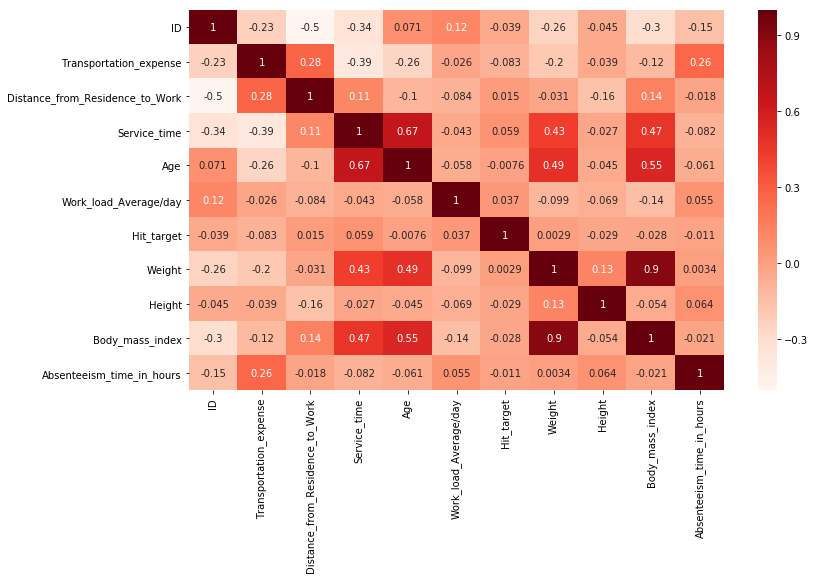

In [67]:
#Plot correlation matrix to find correlation between numerical variables
plt.figure(figsize=(12,7))
cor = df[num_cols].corr()
sbn.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Here, none of the independent attributes are highly correlated with the target and with other each other. 

Chi-Square Test: 
    
This test is used to derive the statistical significance of relationship between the categorical variables in the dataset. It returns probability for the computed chi-square distribution with the degree of freedom.

Hypothesis of Chi-Square test:

1. Null Hypothesis: The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

2. Alternate Hypothesis: The alternate hypothesis of the Chi-Square test is that there exists relationship between the categorical variables in the population; they are not independent.

If p-value is less than 0.05 then we reject the null hypothesis. And if p-value is greater than 0.05 then we accept the null hypothesis.

In [68]:
# Chi-Square test to find relationship among categorical attributes
factors_paired = [(i,j) for i in cat_cols for j in cat_cols] 
chi2, p_val =[], []
for f in factors_paired:
    if f[0] != f[1]:
        ch12, p, dof, ex = chi2_contingency(pd.crosstab(df[f[0]], df[f[1]]))
        chi2.append(ch12)
        p_val.append(p)
    else:
        chi2.append(0)
        p_val.append(0)

p1 = np.array(p_val).reshape((10,10))
df1 = pd.DataFrame(p1, index= cat_cols, columns = cat_cols)
print("Probability distribution is:")
df1

Probability distribution is:


,Education,Seasons,Pet,Day_of_the_week,Disciplinary_failure,Reason_for_absence,Month_of_absence,Social_drinker,Son,Social_smoker
Education,0.000000e+00,1.107407e-01,2.446169e-27,6.167258e-01,9.669382e-01,1.560248e-16,1.168501e-02,3.872295e-33,8.133766e-11,1.285777e-23
Seasons,1.107407e-01,0.000000e+00,1.772464e-04,3.948001e-01,2.425953e-02,3.260335e-20,0.000000e+00,1.843045e-01,2.965377e-06,1.569992e-01
Pet,2.446169e-27,1.772464e-04,0.000000e+00,4.046197e-01,7.200002e-01,8.138594e-19,5.667973e-05,1.740071e-26,3.179308e-88,5.706486e-14
Day_of_the_week,6.167258e-01,3.948001e-01,4.046197e-01,0.000000e+00,2.460672e-01,6.080070e-02,6.087582e-01,3.657264e-01,1.241238e-08,8.227146e-01
Disciplinary_failure,9.669382e-01,2.425953e-02,7.200002e-01,2.460672e-01,0.000000e+00,1.020492e-12,4.180979e-01,6.666733e-01,4.570634e-01,2.660185e-03
Reason_for_absence,1.560248e-16,3.260335e-20,8.138594e-19,6.080070e-02,1.020492e-12,0.000000e+00,1.712661e-14,1.910487e-08,1.417274e-17,3.583594e-08
Month_of_absence,1.168501e-02,0.000000e+00,5.667973e-05,6.087582e-01,4.180979e-01,1.712661e-14,0.000000e+00,2.202100e-02,3.306114e-06,3.194987e-02
Social_drinker,3.872295e-33,1.843045e-01,1.740071e-26,3.657264e-01,6.666733e-01,1.910487e-08,2.202100e-02,0.000000e+00,3.414471e-09,1.608149e-02
Son,8.133766e-11,2.965377e-06,3.179308e-88,1.241238e-08,4.570634e-01,1.417274e-17,3.306114e-06,3.414471e-09,0.000000e+00,2.506498e-21
Social_smoker,1.285777e-23,1.569992e-01,5.706486e-14,8.227146e-01,2.660185e-03,3.583594e-08,3.194987e-02,1.608149e-02,2.506498e-21,0.000000e+00


We can observe that p value of Seasons vs Month_of_absence is 0.000000e+00 which means that it is highly dependent on Month of absence.

In [69]:
#Drop seasons as it is dependent on Month of absence
df = df.drop(['Seasons'],axis=1)

ANOVA: 

Analysis Of Variance or ANOVA is used to find the relationship between independent categorical variables and numerical variable. This can be dependent or independent.

Hypothesis of ANOVA testing:

 -> Null Hypothesis: Mean of all categories in a variable are same and numerical variable doesn't depend on it.
 
 -> Alternate Hypothesis: Mean of at least one category in a variable is different and numerical variable depends on it. 

If p-value is less than 0.05 then we reject the null hypothesis. And if p-value is greater than 0.05 then we accept the null hypothesis.

In [70]:
#ANOVA test
#model = ols('Absenteeism_time_in_hours ~ C(Day_of_the_week_2)+C(Day_of_the_week_3)+C(Day_of_the_week_4)+C(Day_of_the_week_5)+C(Day_of_the_week_6)+C(Education_0)+C(Education_1)+C(Education_2)+C(Education_3)+C(Education_4)+C(Social_drinker_0)+C(Social_drinker_1)+C(Social_smoker_0)+C(Social_smoker_1)+C(Month_of_absence_1)+C(Month_of_absence_2)+C(Month_of_absence_3)+C(Month_of_absence_4)+C(Month_of_absence_5)+C(Month_of_absence_6)+C(Month_of_absence_7)+C(Month_of_absence_8)+C(Month_of_absence_9)+C(Month_of_absence_10)+C(Month_of_absence_11)+C(Month_of_absence_12)+C(Son_0)+C(Son_1)+C(Son_2)+C(Son_3)+C(Son_4)+C(Pet_0)+C(Pet_1)+C(Pet_2)+C(Pet_4)+C(Pet_5)+C(Pet_8)+C(Reason_for_absence_1)+C(Reason_for_absence_2)+C(Reason_for_absence_3)+C(Reason_for_absence_4)+C(Reason_for_absence_5)+C(Reason_for_absence_6)+C(Reason_for_absence_7)+C(Reason_for_absence_8)+C(Reason_for_absence_9)+C(Reason_for_absence_10)+C(Reason_for_absence_11)+C(Reason_for_absence_12)+C(Reason_for_absence_13)+C(Reason_for_absence_14)+C(Reason_for_absence_15)+C(Reason_for_absence_16)+C(Reason_for_absence_17)+C(Reason_for_absence_18)+C(Reason_for_absence_19)+C(Reason_for_absence_20)+C(Reason_for_absence_21)+C(Reason_for_absence_22)+C(Reason_for_absence_23)+C(Reason_for_absence_24)+C(Reason_for_absence_25)+C(Reason_for_absence_26)+C(Reason_for_absence_27)+C(Reason_for_absence_28)+C(Disciplinary_failure_0)+C(Disciplinary_failure_1)', data = df_new).fit()
#aov_table = sm.stats.anova_lm(model)
#aov_table

In [71]:
#ANOVA test
model = ols('Absenteeism_time_in_hours ~ C(Day_of_the_week)+C(Social_drinker)+C(Education)+C(Social_smoker)+C(Month_of_absence)+C(Son)+C(Pet)+C(Reason_for_absence)+C(Disciplinary_failure)', data = df).fit()
aov_table = sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Day_of_the_week),24.436598,4.0,0.886671,4.714536e-01
C(Social_drinker),61.387396,1.0,8.909660,2.944029e-03
C(Education),76.733007,4.0,2.784224,2.590973e-02
C(Social_smoker),0.518578,1.0,0.075266,7.839068e-01
C(Month_of_absence),74.198693,11.0,0.979006,4.640588e-01
C(Son),114.587126,4.0,4.157744,2.476011e-03
C(Pet),99.677447,5.0,2.893402,1.358614e-02
C(Reason_for_absence),2231.300278,27.0,11.994335,2.172222e-41
C(Disciplinary_failure),16.543725,1.0,2.401128,1.217383e-01
Residual,4444.038154,645.0,NaN,NaN


In [72]:
#to get the attributes that are significant to the target 
for i in range(0,len(aov_table['PR(>F)'])):
    if aov_table['PR(>F)'][i] < 0.05:
        print(aov_table.index[i])

C(Social_drinker)
C(Education)
C(Son)
C(Pet)
C(Reason_for_absence)


Thus, all the attributes except Social smoker are significant to the target. Hence, we can consider all of the attributes given above.

In [73]:
#Drop Social_Smoker as it is not significant to the target
df = df.drop(['Social_smoker'],axis=1)

In [74]:
df_selected = df.copy()

Since our dataset consists of numerical and categorical features, we need to hot encode each category of categorical variables to perform data modelling.

In [75]:
cat_cols = ['Son',
 'Disciplinary_failure',
 'Social_drinker',
 'Pet',
 'Reason_for_absence',
 'Education',
 'Day_of_the_week',
 'Month_of_absence']

In [76]:
#Hot encoding of categorical features
df_sample = df[num_cols]
df_dummies = pd.get_dummies(df[cat_cols],drop_first=True)
df = pd.concat([df_sample, df_dummies], axis=1)
df.reset_index(drop=True)

,ID,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,Hit_target,Weight,Height,Body_mass_index,...,Month_of_absence_3,Month_of_absence_4,Month_of_absence_5,Month_of_absence_6,Month_of_absence_7,Month_of_absence_8,Month_of_absence_9,Month_of_absence_10,Month_of_absence_11,Month_of_absence_12
0,11,289.0,36.0,13.0,33.0,239554.0,97.0,90.0,172.0,30.0,...,0,0,0,0,1,0,0,0,0,0
1,3,179.0,51.0,18.0,38.0,239554.0,97.0,89.0,170.0,31.0,...,0,0,0,0,1,0,0,0,0,0
2,7,279.0,5.0,14.0,39.0,239554.0,97.0,68.0,168.0,24.0,...,0,0,0,0,1,0,0,0,0,0
3,11,289.0,36.0,13.0,33.0,239554.0,97.0,90.0,172.0,30.0,...,0,0,0,0,1,0,0,0,0,0
4,3,179.0,51.0,18.0,38.0,239554.0,97.0,89.0,170.0,31.0,...,0,0,0,0,1,0,0,0,0,0
5,10,354.0,52.0,3.0,28.0,239554.0,97.0,80.0,172.0,27.0,...,0,0,0,0,1,0,0,0,0,0
6,20,260.0,50.0,11.0,36.0,239554.0,97.0,65.0,168.0,23.0,...,0,0,0,0,1,0,0,0,0,0
7,14,155.0,12.0,14.0,34.0,239554.0,97.0,95.0,169.0,25.0,...,0,0,0,0,1,0,0,0,0,0
8,1,235.0,11.0,14.0,37.0,239554.0,97.0,88.0,172.0,29.0,...,0,0,0,0,1,0,0,0,0,0
9,20,260.0,50.0,11.0,36.0,239554.0,97.0,65.0,168.0,23.0,...,0,0,0,0,1,0,0,0,0,0


##### Feature Scaling

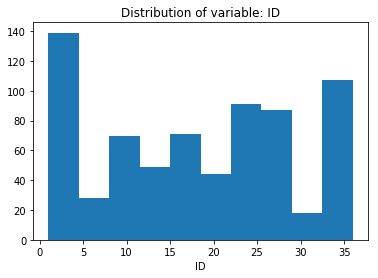

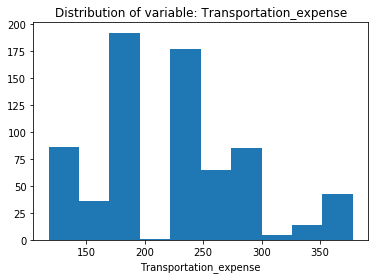

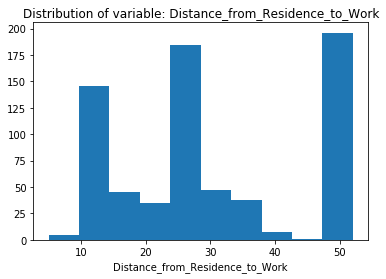

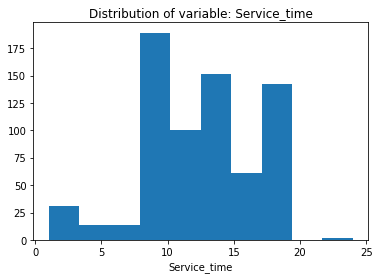

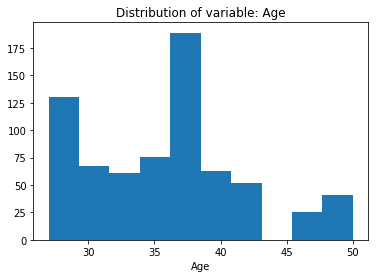

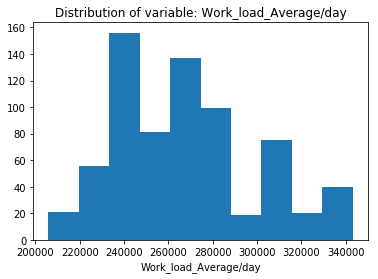

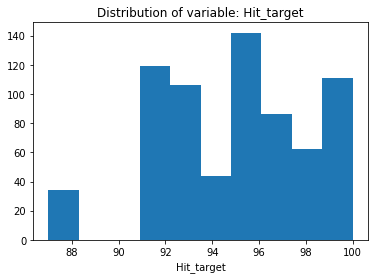

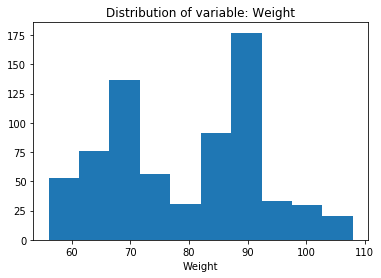

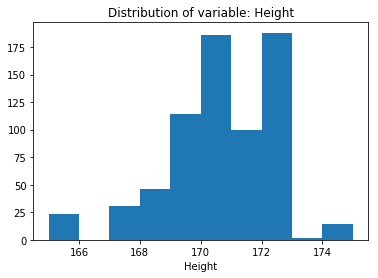

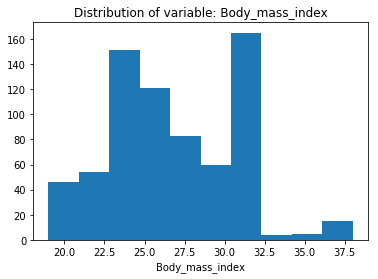

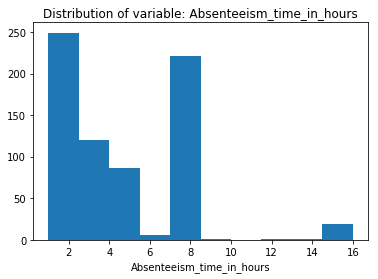

In [77]:
#to get the distribution of numerical variables for normality check
for i in num_cols:
    plt.figure()
    plt.clf()
    plt.hist(df[i])
    plt.title("Distribution of variable: " + i)
    plt.xlabel(i)

Thus, the distributions are not gaussian and hence we have to normalize the data to bring them in a common range.

In [78]:
#Normalization on dataset
for i in df.columns:
    df.loc[:,i] = (df.loc[:,i] - np.min(df.loc[:,i]))/(np.max(df.loc[:,i])-np.min(df.loc[:,i]))

In [79]:
df.head()

,ID,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,Hit_target,Weight,Height,Body_mass_index,...,Month_of_absence_3,Month_of_absence_4,Month_of_absence_5,Month_of_absence_6,Month_of_absence_7,Month_of_absence_8,Month_of_absence_9,Month_of_absence_10,Month_of_absence_11,Month_of_absence_12
0,0.285714,0.657692,0.659574,0.521739,0.260870,0.244925,0.769231,0.653846,0.7,0.578947,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.057143,0.234615,0.978723,0.739130,0.478261,0.244925,0.769231,0.634615,0.5,0.631579,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.171429,0.619231,0.000000,0.565217,0.521739,0.244925,0.769231,0.230769,0.3,0.263158,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.285714,0.657692,0.659574,0.521739,0.260870,0.244925,0.769231,0.653846,0.7,0.578947,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.057143,0.234615,0.978723,0.739130,0.478261,0.244925,0.769231,0.634615,0.5,0.631579,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [80]:
df_normalized = df.copy()

#### Applying Machine Learning algorithms

We can split the data into train and test datasets. Training dataset is used for building training model and test dataset is for validating our model. This is done to understand the robustness, accuracy and performance of the model built. 

In [81]:
df.iloc[:,10].head()

0    0.200000
2    0.066667
3    0.200000
4    0.066667
5    0.066667
Name: Absenteeism_time_in_hours, dtype: float64

In [82]:
#Obtain test and training dataset 
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:, df.columns != 'Absenteeism_time_in_hours'],df.iloc[:,10],test_size=0.2,random_state = 42)

In [83]:
#Dimensions of training dataset
print(X_train.shape)
print(Y_train.shape)

(563, 67)
(563,)


In [84]:
#Dimensions of test dataset
print(X_test.shape)
print(Y_test.shape)

(141, 67)
(141,)


#### Linear Regression

In [85]:
#Building linear regression model on training dataset
LR_model = LinearRegression().fit(X_train, Y_train)

In [86]:
#Predict target values on training and test dataset
Ypred_train_LR = LR_model.predict(X_train)
Ypred_test_LR = LR_model.predict(X_test)

In [87]:
#Calculating RMSE values for training and test dataset
RMSE_train_LR = np.sqrt(mean_squared_error(Y_train, Ypred_train_LR))
RMSE_test_LR = np.sqrt(mean_squared_error(Y_test, Ypred_test_LR))

In [88]:
#RMSE calculation for training data
print("RMSE value of training data is:")
print(RMSE_train_LR)

#RMSE calculation for test data
print("RMSE value of test data is:")
print(RMSE_test_LR)

#R^2 calculation for train data
print("R2 score of training data is:")
print(r2_score(Y_train, Ypred_train_LR))

#R^2 calculation for test data
print("R2 score of test data is:")
print(r2_score(Y_test, Ypred_test_LR))

RMSE value of training data is:
0.15426840125452113
RMSE value of test data is:
0.20847435587305038
R2 score of training data is:
0.4674263799330639
R2 score of test data is:
0.32782913521020485


#### Decision Tree model

In [89]:
#Building decision tree model on training dataset
DT_model = DecisionTreeRegressor(max_depth=2,random_state = 42).fit(X_train,Y_train)

In [90]:
DT_model

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [91]:
#Predict target values on training and test dataset
Ypred_train_DT = DT_model.predict(X_train)
Ypred_test_DT = DT_model.predict(X_test)

In [92]:
#Calculating RMSE values for training and test dataset
RMSE_train_DT = np.sqrt(mean_squared_error(Y_train, Ypred_train_DT))
RMSE_test_DT = np.sqrt(mean_squared_error(Y_test, Ypred_test_DT))

In [93]:
#RMSE calculation for training data
print("RMSE value of training data is:")
print(RMSE_train_DT)

#RMSE calculation for test data
print("RMSE value of test data is:")
print(RMSE_test_DT)

#R^2 calculation for train data
print("R2 score of training data is:")
print(r2_score(Y_train, Ypred_train_DT))

#R^2 calculation for test data
print("R2 score of test data is:")
print(r2_score(Y_test, Ypred_test_DT))

RMSE value of training data is:
0.1915355006658154
RMSE value of test data is:
0.23766373118278583
R2 score of training data is:
0.17903573087970592
R2 score of test data is:
0.12642494390809056


#### Random Forest model

In [94]:
#Building random forest model on training dataset
RF_model = RandomForestRegressor(n_estimators = 200,random_state=42).fit(X_train,Y_train)

In [95]:
#Predict target values on training and test dataset
Ypred_train_RF = RF_model.predict(X_train)
Ypred_test_RF = RF_model.predict(X_test)

In [96]:
#calculating RMSE for training and test dataset
RMSE_train_RF = np.sqrt(mean_squared_error(Y_train, Ypred_train_RF))
RMSE_test_RF = np.sqrt(mean_squared_error(Y_test, Ypred_test_RF))

In [97]:
#RMSE calculation for training data
print("RMSE value of training data is:")
print(RMSE_train_RF)

#RMSE calculation for test data
print("RMSE value of test data is:")
print(RMSE_test_RF)

#R^2 calculation for training data
print("R2 score of training data is:")
print(r2_score(Y_train, Ypred_train_RF))

#R^2 calculation for test data
print("R2 score of test data is:")
print(r2_score(Y_test, Ypred_test_RF))

RMSE value of training data is:
0.07031719189101368
RMSE value of test data is:
0.19711876793050032
R2 score of training data is:
0.8893506846553185
R2 score of test data is:
0.39906104877806736


#### Gradient boosting model

In [98]:
#Build Gradient Boosting Model on trainig dataset
GBM_model = GradientBoostingRegressor(random_state=42).fit(X_train,Y_train)

In [99]:
#Predict target values on training and test dataset
Ypred_train_GBM = GBM_model.predict(X_train)
Ypred_test_GBM = GBM_model.predict(X_test)

In [100]:
#calculating RMSE for training and test dataset
RMSE_train_GBM = np.sqrt(mean_squared_error(Y_train, Ypred_train_GBM))
RMSE_test_GBM = np.sqrt(mean_squared_error(Y_test, Ypred_test_GBM))

In [101]:
#RMSE calculation for training data
print("RMSE value of training data is:")
print(RMSE_train_GBM)

#RMSE calculation for test data
print("RMSE value of test data is:")
print(RMSE_test_GBM)

#R^2 calculation for train data
print("R2 score of training data is:")
print(r2_score(Y_train, Ypred_train_GBM))

#R^2 calculation for test data
print("R2 score of test data is:")
print(r2_score(Y_test, Ypred_test_GBM))

RMSE value of training data is:
0.12735078584139936
RMSE value of test data is:
0.21084018397799467
R2 score of training data is:
0.6370649166304359
R2 score of test data is:
0.3124865864780011


We can conclude that although Random Forest Model yields maximum R^2 value, there is very much difference in the R2 values of training and test dataset, thus there is a chance that it might nt generalize well. Hence, we can predict test dataset using GBM Model.

In [102]:
#importance = RF_model.feature_importances_
#importance = pd.DataFrame(importance, index=X_train.columns, columns=["Importance"])
#importance = importance.sort_values('Importance',ascending=False)
#importance

#### Prediction of absent hours for the year 2011:

Thus, from the data given it is clear that it is past data. Now, we are expected to make project losses every month in 2011 if same trend of absenteeism continues. Thus, assuming that the given data is from year 2010, we can frame the sample dataset for 2011 by increasing the age and service time of the employees and keeping the rest of the data constant assuming there will not be much change to it. 

In [103]:
df_data_2011 = df_selected.drop(['Absenteeism_time_in_hours'],axis=1).copy()

In [104]:
#Increment Age and Service time in the dataset
for i in num_cols:
    if i == 'Age':
        df_data_2011[i] = df_data_2011[i] + 1.0
    elif i == 'Service_time':
        df_data_2011[i] = df_data_2011[i] + 1.0

Since the data is preprocessed in dataset for 2011, let's continue with the below steps:

In [105]:
num_cols_2011 = df_data_2011._get_numeric_data().columns
cat_cols_2011 = ['Son',
 'Disciplinary_failure',
 'Social_drinker',
 'Pet',
 'Reason_for_absence',
 'Education',
 'Day_of_the_week',
 'Month_of_absence']

In [106]:
#Hot encoding of categorical features
df_sample_2011 = df_data_2011[num_cols_2011]
df_dummies_2011 = pd.get_dummies(df_data_2011[cat_cols_2011],drop_first=True)
df_data_2011 = pd.concat([df_sample_2011, df_dummies_2011], axis=1)
df_data_2011.reset_index(drop=True)

,ID,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,Hit_target,Weight,Height,Body_mass_index,...,Month_of_absence_3,Month_of_absence_4,Month_of_absence_5,Month_of_absence_6,Month_of_absence_7,Month_of_absence_8,Month_of_absence_9,Month_of_absence_10,Month_of_absence_11,Month_of_absence_12
0,11,289.0,36.0,14.0,34.0,239554.0,97.0,90.0,172.0,30.0,...,0,0,0,0,1,0,0,0,0,0
1,3,179.0,51.0,19.0,39.0,239554.0,97.0,89.0,170.0,31.0,...,0,0,0,0,1,0,0,0,0,0
2,7,279.0,5.0,15.0,40.0,239554.0,97.0,68.0,168.0,24.0,...,0,0,0,0,1,0,0,0,0,0
3,11,289.0,36.0,14.0,34.0,239554.0,97.0,90.0,172.0,30.0,...,0,0,0,0,1,0,0,0,0,0
4,3,179.0,51.0,19.0,39.0,239554.0,97.0,89.0,170.0,31.0,...,0,0,0,0,1,0,0,0,0,0
5,10,354.0,52.0,4.0,29.0,239554.0,97.0,80.0,172.0,27.0,...,0,0,0,0,1,0,0,0,0,0
6,20,260.0,50.0,12.0,37.0,239554.0,97.0,65.0,168.0,23.0,...,0,0,0,0,1,0,0,0,0,0
7,14,155.0,12.0,15.0,35.0,239554.0,97.0,95.0,169.0,25.0,...,0,0,0,0,1,0,0,0,0,0
8,1,235.0,11.0,15.0,38.0,239554.0,97.0,88.0,172.0,29.0,...,0,0,0,0,1,0,0,0,0,0
9,20,260.0,50.0,12.0,37.0,239554.0,97.0,65.0,168.0,23.0,...,0,0,0,0,1,0,0,0,0,0


In [107]:
#Normalization on dataset
for i in df_data_2011.columns:
    df_data_2011.loc[:,i] = (df_data_2011.loc[:,i] - np.min(df_data_2011.loc[:,i]))/(np.max(df_data_2011.loc[:,i])-np.min(df_data_2011.loc[:,i]))

In [108]:
df_data_2011.head()

,ID,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,Hit_target,Weight,Height,Body_mass_index,...,Month_of_absence_3,Month_of_absence_4,Month_of_absence_5,Month_of_absence_6,Month_of_absence_7,Month_of_absence_8,Month_of_absence_9,Month_of_absence_10,Month_of_absence_11,Month_of_absence_12
0,0.285714,0.657692,0.659574,0.521739,0.260870,0.244925,0.769231,0.653846,0.7,0.578947,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.057143,0.234615,0.978723,0.739130,0.478261,0.244925,0.769231,0.634615,0.5,0.631579,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.171429,0.619231,0.000000,0.565217,0.521739,0.244925,0.769231,0.230769,0.3,0.263158,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.285714,0.657692,0.659574,0.521739,0.260870,0.244925,0.769231,0.653846,0.7,0.578947,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.057143,0.234615,0.978723,0.739130,0.478261,0.244925,0.769231,0.634615,0.5,0.631579,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [109]:
#Predict using Random Forest model
Ypred_2011= GBM_model.predict(df_data_2011)

In [110]:
#Adding predicted absent hours to the test dataset 
df_data_2011['Predicted_Absent_hours'] = Ypred_2011

In [113]:
df_data_2011['Predicted_Absent_hours'].head()

0    0.368500
2    0.119028
3    0.374129
4    0.178333
5    0.112028
Name: Predicted_Absent_hours, dtype: float64